# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:21:05.773365: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:21:09.177953
2025-04-14 22:21:09.177953


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 9
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:21:03"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

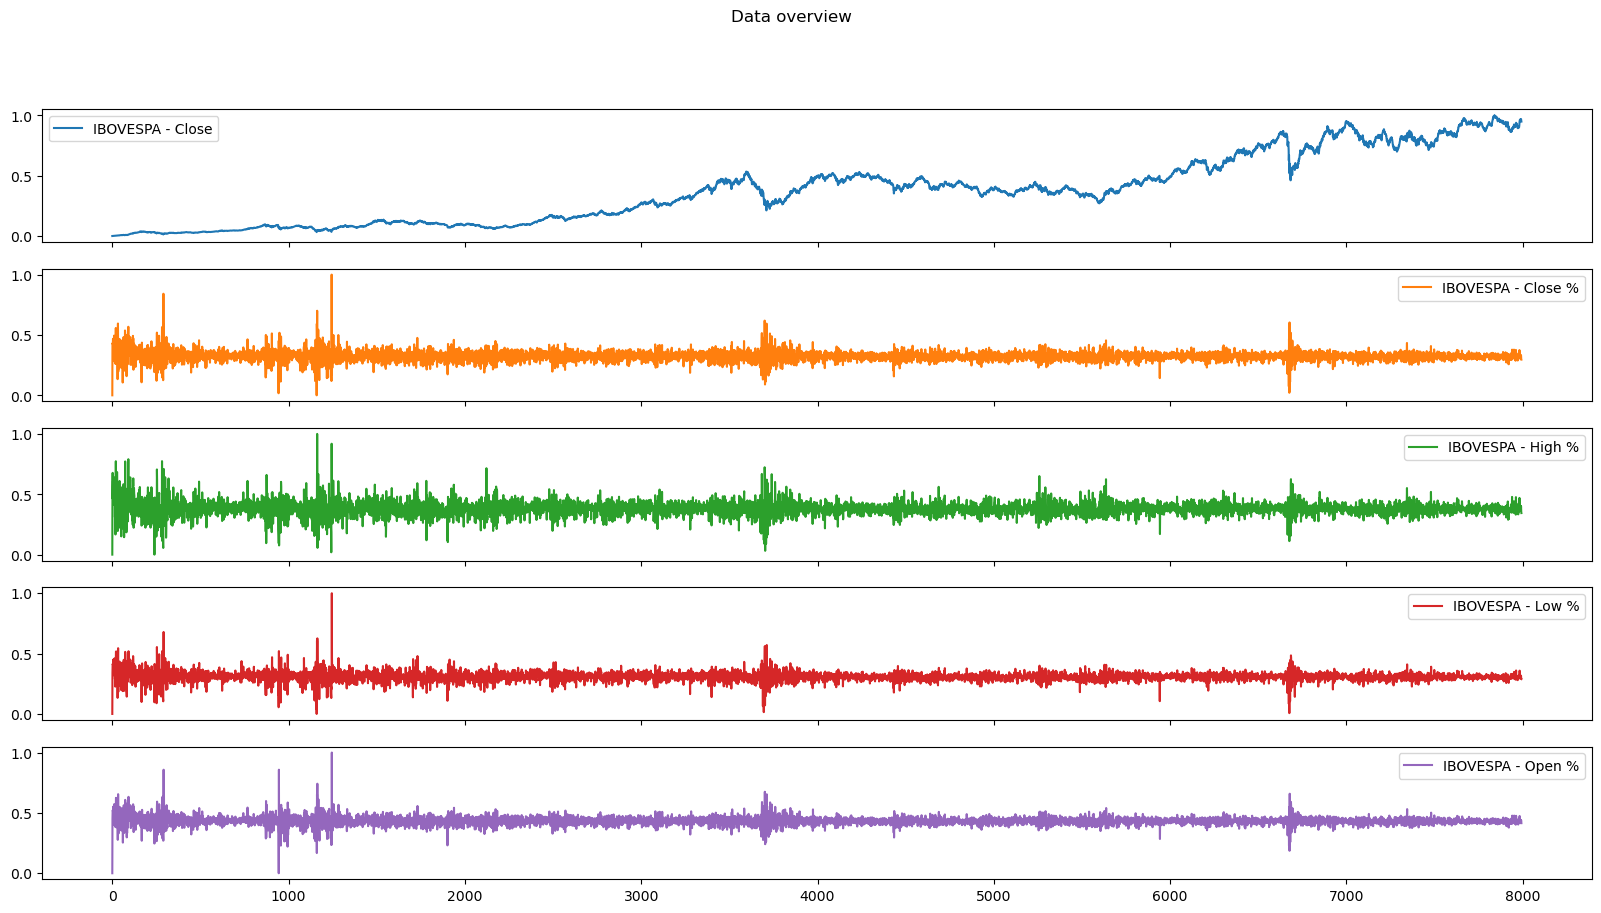

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

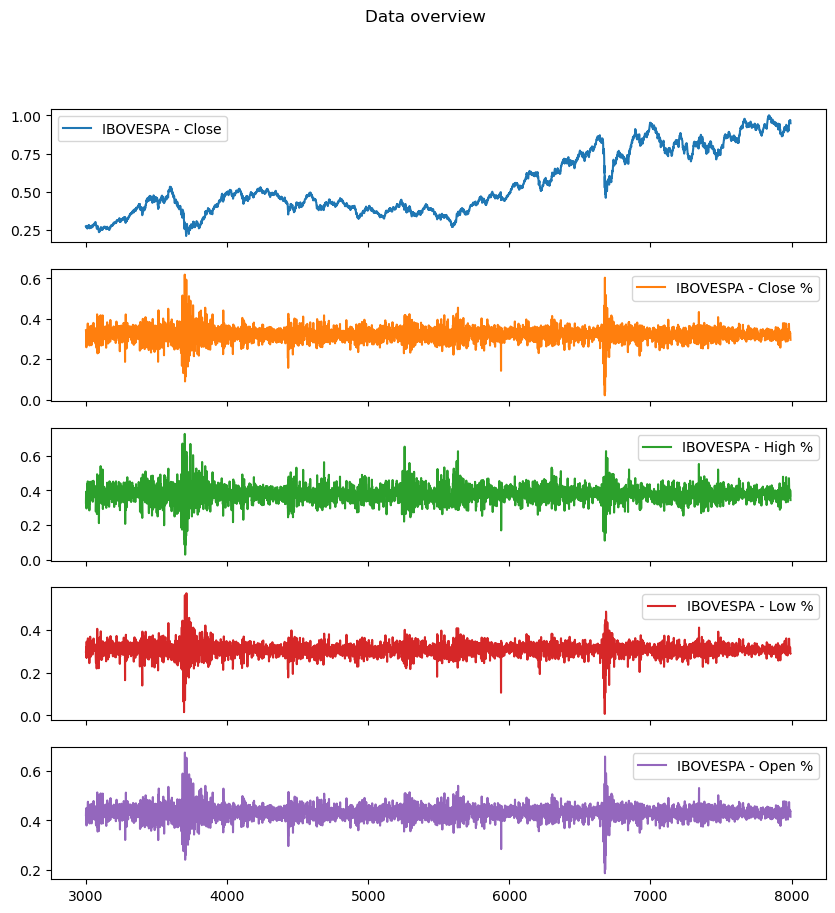

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

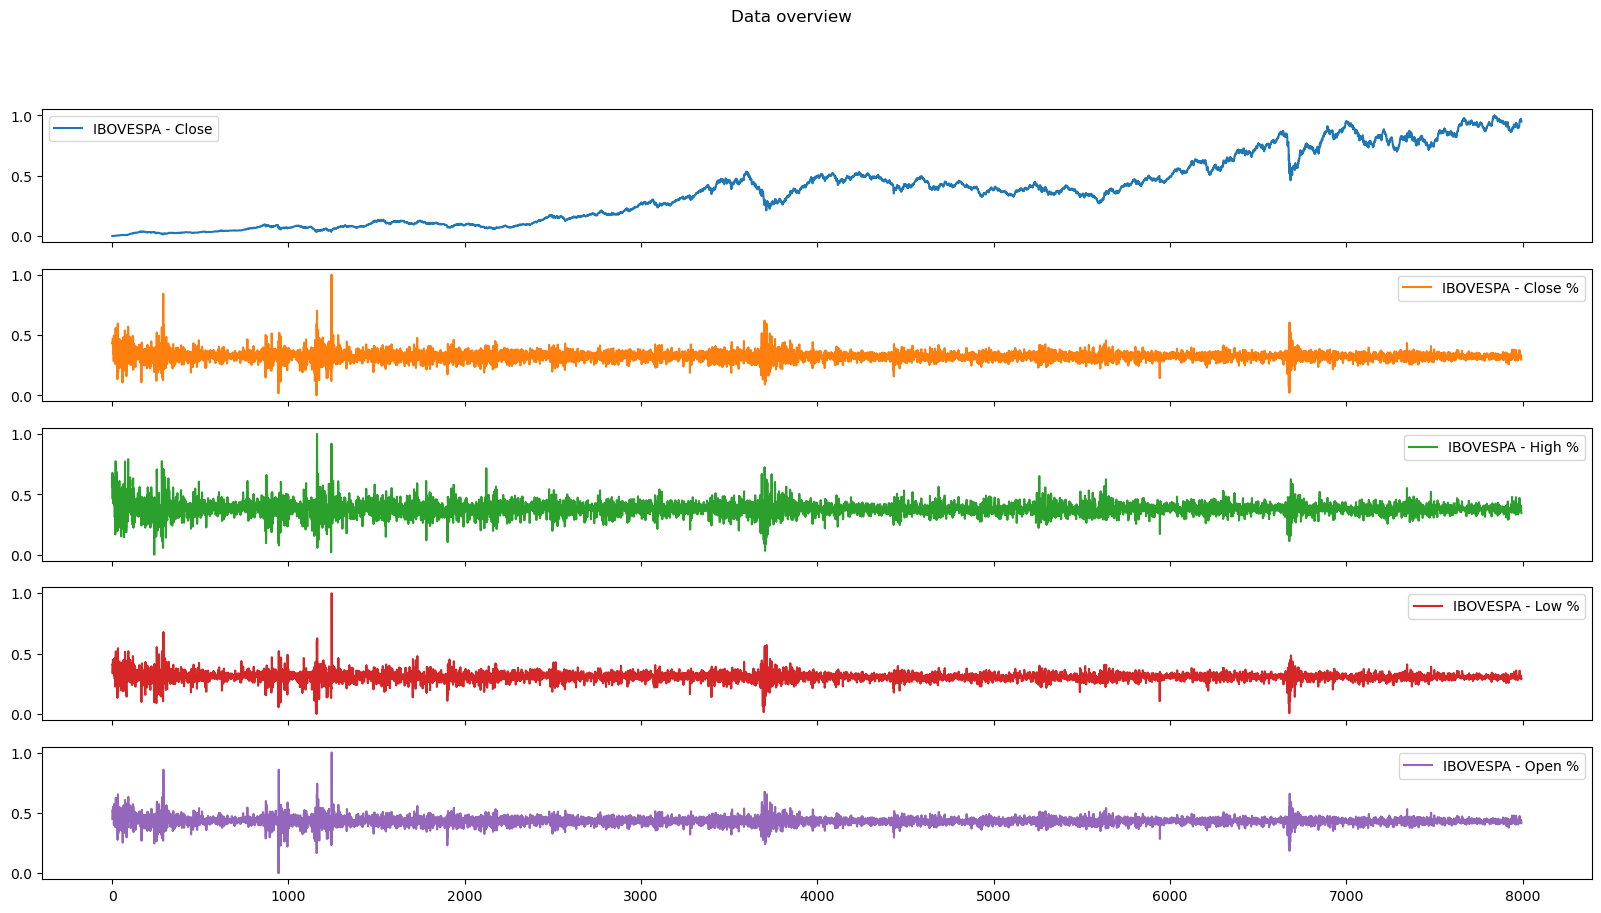

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

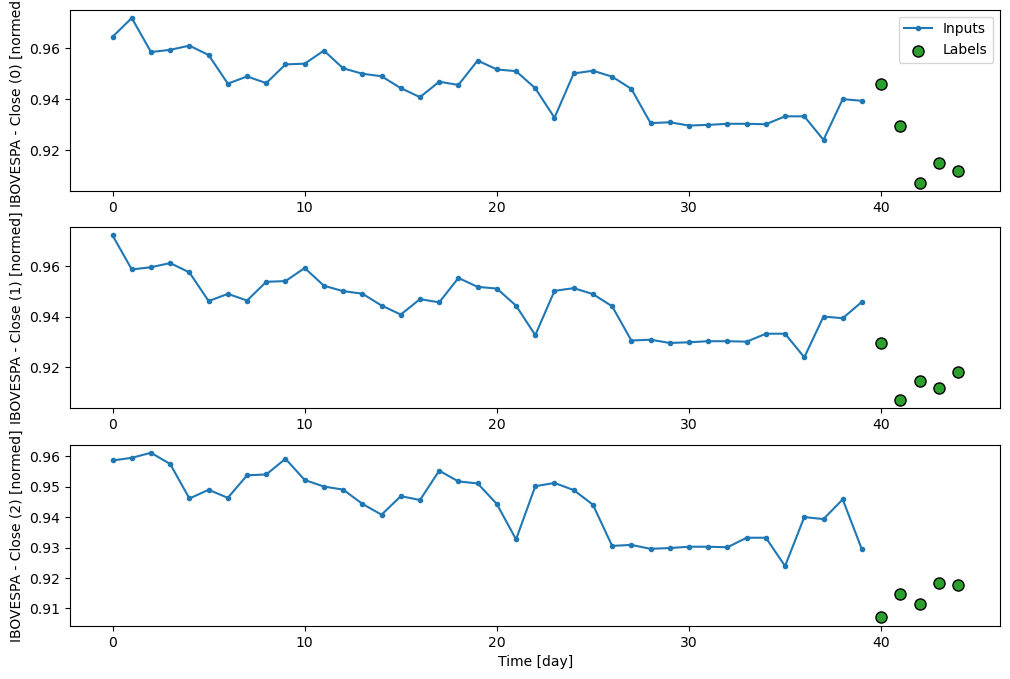

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 5), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

5

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10:11 3s/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.8622e-05 - root_mean_squared_error: 0.0077

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 143.6287 - mean_squared_error: 3.8641e-04 - root_mean_squared_error: 0.0185 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 121.9022 - mean_squared_error: 3.5581e-04 - root_mean_squared_error: 0.0182

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 109.9112 - mean_squared_error: 3.3465e-04 - root_mean_squared_error: 0.0178

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 100.7486 - mean_squared_error: 3.1255e-04 - root_mean_squared_error: 0.0173

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 90.6190 - mean_squared_error: 2.8439e-04 - root_mean_squared_error: 0.0165 

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 82.4481 - mean_squared_error: 2.6024e-04 - root_mean_squared_error: 0.0157

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 77.4782 - mean_squared_error: 2.4630e-04 - root_mean_squared_error: 0.0153

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 73.4762 - mean_squared_error: 2.4167e-04 - root_mean_squared_error: 0.0152

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 69.2084 - mean_squared_error: 2.4584e-04 - root_mean_squared_error: 0.0153

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 66.5515 - mean_squared_error: 2.5170e-04 - root_mean_squared_error: 0.0155

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 64.1661 - mean_squared_error: 2.5510e-04 - root_mean_squared_error: 0.0157

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.0452 - mean_squared_error: 2.5786e-04 - root_mean_squared_error: 0.0158

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 60.1747 - mean_squared_error: 2.6145e-04 - root_mean_squared_error: 0.0159

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 58.4345 - mean_squared_error: 2.6368e-04 - root_mean_squared_error: 0.0160

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.3173 - mean_squared_error: 2.6625e-04 - root_mean_squared_error: 0.0161

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.8560 - mean_squared_error: 2.6759e-04 - root_mean_squared_error: 0.0161

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.4861 - mean_squared_error: 2.6828e-04 - root_mean_squared_error: 0.0162

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.8040 - mean_squared_error: 2.6859e-04 - root_mean_squared_error: 0.0162

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 50.6511 - mean_squared_error: 2.6879e-04 - root_mean_squared_error: 0.0162

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 49.5786 - mean_squared_error: 2.6885e-04 - root_mean_squared_error: 0.0162

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 48.5911 - mean_squared_error: 2.6893e-04 - root_mean_squared_error: 0.0162

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 47.6574 - mean_squared_error: 2.6877e-04 - root_mean_squared_error: 0.0162

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 46.5355 - mean_squared_error: 2.7109e-04 - root_mean_squared_error: 0.0163

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 45.7925 - mean_squared_error: 2.7878e-04 - root_mean_squared_error: 0.0165

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 45.0981 - mean_squared_error: 2.8714e-04 - root_mean_squared_error: 0.0167

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 44.4312 - mean_squared_error: 2.9473e-04 - root_mean_squared_error: 0.0169

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 43.7923 - mean_squared_error: 3.0183e-04 - root_mean_squared_error: 0.0171

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 43.1782 - mean_squared_error: 3.0855e-04 - root_mean_squared_error: 0.0173

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 42.4186 - mean_squared_error: 3.2269e-04 - root_mean_squared_error: 0.0176

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 41.8826 - mean_squared_error: 3.3562e-04 - root_mean_squared_error: 0.0179

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 41.3598 - mean_squared_error: 3.4730e-04 - root_mean_squared_error: 0.0182

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 40.8522 - mean_squared_error: 3.5838e-04 - root_mean_squared_error: 0.0185

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 40.3637 - mean_squared_error: 3.7038e-04 - root_mean_squared_error: 0.0187

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 39.8920 - mean_squared_error: 3.8337e-04 - root_mean_squared_error: 0.0190

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 39.4368 - mean_squared_error: 3.9740e-04 - root_mean_squared_error: 0.0193

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 39.0065 - mean_squared_error: 4.1527e-04 - root_mean_squared_error: 0.0197

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 38.4688 - mean_squared_error: 4.4305e-04 - root_mean_squared_error: 0.0202

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 37.9713 - mean_squared_error: 4.8516e-04 - root_mean_squared_error: 0.0209

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 37.6322 - mean_squared_error: 5.4308e-04 - root_mean_squared_error: 0.0217

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 37.3159 - mean_squared_error: 6.1412e-04 - root_mean_squared_error: 0.0225

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 37.0165 - mean_squared_error: 6.9116e-04 - root_mean_squared_error: 0.0235

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 36.7252 - mean_squared_error: 7.6589e-04 - root_mean_squared_error: 0.0244

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 36.4489 - mean_squared_error: 8.4304e-04 - root_mean_squared_error: 0.0253

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 36.1823 - mean_squared_error: 9.1860e-04 - root_mean_squared_error: 0.0261

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 35.9197 - mean_squared_error: 9.8975e-04 - root_mean_squared_error: 0.0270

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 35.6599 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277    

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 35.4035 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0285

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 35.1524 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0292

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 34.8263 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0301

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 34.5867 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0307

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 34.3526 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0313

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 34.1221 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 33.8948 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0324

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 33.6723 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0329

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 33.3858 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0336

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 33.1065 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0342

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 32.8382 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0348

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 32.5798 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0355

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 32.3927 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0359

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 32.2089 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0364

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 32.0268 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 31.8466 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0372

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 31.6678 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0376

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 31.4907 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0380

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 31.3203 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0384

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 31.1542 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0388

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 30.9908 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0392

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 30.7784 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0398

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 30.5698 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0403

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 30.3642 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0408

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 30.2119 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0412

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 30.0609 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 29.8632 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0420 - val_loss: 0.1186 - val_mean_absolute_error: 0.1186 - val_mean_absolute_percentage_error: 12.6067 - val_mean_squared_error: 0.0148 - val_root_mean_squared_error: 0.1215 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.7194 - mean_absolute_error: 0.7194 - mean_absolute_percentage_error: 9555.7383 - mean_squared_error: 0.5175 - root_mean_squared_error: 0.7194

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.7181 - mean_absolute_error: 0.7181 - mean_absolute_percentage_error: 7311.6562 - mean_squared_error: 0.5159 - root_mean_squared_error: 0.7182 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.7066 - mean_absolute_error: 0.7066 - mean_absolute_percentage_error: 5743.9092 - mean_squared_error: 0.4999 - root_mean_squared_error: 0.7069

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6946 - mean_absolute_error: 0.6946 - mean_absolute_percentage_error: 5158.5601 - mean_squared_error: 0.4840 - root_mean_squared_error: 0.6954

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6773 - mean_absolute_error: 0.6773 - mean_absolute_percentage_error: 4726.7031 - mean_squared_error: 0.4636 - root_mean_squared_error: 0.6799

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.6433 - mean_absolute_error: 0.6433 - mean_absolute_percentage_error: 4255.5034 - mean_squared_error: 0.4308 - root_mean_squared_error: 0.6537

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6167 - mean_absolute_error: 0.6167 - mean_absolute_percentage_error: 3963.2378 - mean_squared_error: 0.4070 - root_mean_squared_error: 0.6337

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5902 - mean_absolute_error: 0.5902 - mean_absolute_percentage_error: 3709.6572 - mean_squared_error: 0.3849 - root_mean_squared_error: 0.6145

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5657 - mean_absolute_error: 0.5657 - mean_absolute_percentage_error: 3489.3892 - mean_squared_error: 0.3649 - root_mean_squared_error: 0.5965

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5429 - mean_absolute_error: 0.5429 - mean_absolute_percentage_error: 3296.0342 - mean_squared_error: 0.3468 - root_mean_squared_error: 0.5797

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5216 - mean_absolute_error: 0.5216 - mean_absolute_percentage_error: 3124.8967 - mean_squared_error: 0.3305 - root_mean_squared_error: 0.5642

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4957 - mean_absolute_error: 0.4957 - mean_absolute_percentage_error: 2925.4890 - mean_squared_error: 0.3110 - root_mean_squared_error: 0.5452

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4780 - mean_absolute_error: 0.4780 - mean_absolute_percentage_error: 2793.7578 - mean_squared_error: 0.2980 - root_mean_squared_error: 0.5320

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4616 - mean_absolute_error: 0.4616 - mean_absolute_percentage_error: 2674.8740 - mean_squared_error: 0.2861 - root_mean_squared_error: 0.5198

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4464 - mean_absolute_error: 0.4464 - mean_absolute_percentage_error: 2566.8357 - mean_squared_error: 0.2752 - root_mean_squared_error: 0.5084

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4323 - mean_absolute_error: 0.4323 - mean_absolute_percentage_error: 2468.1985 - mean_squared_error: 0.2652 - root_mean_squared_error: 0.4978

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4192 - mean_absolute_error: 0.4192 - mean_absolute_percentage_error: 2377.8169 - mean_squared_error: 0.2560 - root_mean_squared_error: 0.4878

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4070 - mean_absolute_error: 0.4070 - mean_absolute_percentage_error: 2294.6423 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4784

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3955 - mean_absolute_error: 0.3955 - mean_absolute_percentage_error: 2217.7805 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4695

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3814 - mean_absolute_error: 0.3814 - mean_absolute_percentage_error: 2123.9028 - mean_squared_error: 0.2298 - root_mean_squared_error: 0.4584

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3715 - mean_absolute_error: 0.3715 - mean_absolute_percentage_error: 2059.1787 - mean_squared_error: 0.2230 - root_mean_squared_error: 0.4506

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 1998.7993 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4432

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3533 - mean_absolute_error: 0.3533 - mean_absolute_percentage_error: 1942.3085 - mean_squared_error: 0.2108 - root_mean_squared_error: 0.4362

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3450 - mean_absolute_error: 0.3450 - mean_absolute_percentage_error: 1889.3408 - mean_squared_error: 0.2053 - root_mean_squared_error: 0.4295

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3372 - mean_absolute_error: 0.3372 - mean_absolute_percentage_error: 1839.5562 - mean_squared_error: 0.2000 - root_mean_squared_error: 0.4232

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 1792.6536 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4171

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3228 - mean_absolute_error: 0.3228 - mean_absolute_percentage_error: 1748.3925 - mean_squared_error: 0.1904 - root_mean_squared_error: 0.4113

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3161 - mean_absolute_error: 0.3161 - mean_absolute_percentage_error: 1706.5325 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.4057

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3077 - mean_absolute_error: 0.3077 - mean_absolute_percentage_error: 1654.1079 - mean_squared_error: 0.1804 - root_mean_squared_error: 0.3986

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3017 - mean_absolute_error: 0.3017 - mean_absolute_percentage_error: 1617.1167 - mean_squared_error: 0.1765 - root_mean_squared_error: 0.3936

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2942 - mean_absolute_error: 0.2942 - mean_absolute_percentage_error: 1570.6105 - mean_squared_error: 0.1715 - root_mean_squared_error: 0.3871

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2888 - mean_absolute_error: 0.2888 - mean_absolute_percentage_error: 1537.6575 - mean_squared_error: 0.1680 - root_mean_squared_error: 0.3825

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1506.2228 - mean_squared_error: 0.1647 - root_mean_squared_error: 0.3781

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2772 - mean_absolute_error: 0.2772 - mean_absolute_percentage_error: 1466.4950 - mean_squared_error: 0.1604 - root_mean_squared_error: 0.3724

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1438.2137 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3683

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2682 - mean_absolute_error: 0.2682 - mean_absolute_percentage_error: 1411.1324 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3644

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2640 - mean_absolute_error: 0.2640 - mean_absolute_percentage_error: 1385.1978 - mean_squared_error: 0.1517 - root_mean_squared_error: 0.3606

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2588 - mean_absolute_error: 0.2588 - mean_absolute_percentage_error: 1352.3015 - mean_squared_error: 0.1483 - root_mean_squared_error: 0.3558

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1321.1351 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3513

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2505 - mean_absolute_error: 0.2505 - mean_absolute_percentage_error: 1298.8003 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3480

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2471 - mean_absolute_error: 0.2471 - mean_absolute_percentage_error: 1277.2982 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3448

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1256.5817 - mean_squared_error: 0.1381 - root_mean_squared_error: 0.3417

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 1236.6052 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3387

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1217.3334 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3358

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2339 - mean_absolute_error: 0.2339 - mean_absolute_percentage_error: 1192.6691 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3320

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2311 - mean_absolute_error: 0.2311 - mean_absolute_percentage_error: 1174.8953 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3293

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1152.0997 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3257

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 1135.6427 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3231

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1119.7045 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3206

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1099.2162 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3173

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 1084.3934 - mean_squared_error: 0.1198 - root_mean_squared_error: 0.3150

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1070.0123 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3126

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 1056.0515 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3104

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2092 - mean_absolute_error: 0.2092 - mean_absolute_percentage_error: 1038.0602 - mean_squared_error: 0.1149 - root_mean_squared_error: 0.3074

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2071 - mean_absolute_error: 0.2071 - mean_absolute_percentage_error: 1025.0140 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.3053

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2044 - mean_absolute_error: 0.2044 - mean_absolute_percentage_error: 1008.1801 - mean_squared_error: 0.1117 - root_mean_squared_error: 0.3025

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 995.9584 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.3004 

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 980.1737 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.2978

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 964.9443 - mean_squared_error: 0.1070 - root_mean_squared_error: 0.2952

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 953.8682 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.2934

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1935 - mean_absolute_error: 0.1935 - mean_absolute_percentage_error: 939.5350 - mean_squared_error: 0.1043 - root_mean_squared_error: 0.2909

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 929.0971 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.2892

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 918.9146 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2874

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 905.7194 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.2851

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 896.1015 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2835

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1852 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 886.7100 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2819

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 877.5364 - mean_squared_error: 0.0977 - root_mean_squared_error: 0.2803

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1823 - mean_absolute_error: 0.1823 - mean_absolute_percentage_error: 868.5734 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2787

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 859.8125 - mean_squared_error: 0.0958 - root_mean_squared_error: 0.2772

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 851.2466 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2757

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 842.8691 - mean_squared_error: 0.0940 - root_mean_squared_error: 0.2742

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1767 - mean_absolute_error: 0.1767 - mean_absolute_percentage_error: 831.9805 - mean_squared_error: 0.0928 - root_mean_squared_error: 0.2723

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 821.4040 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2704

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 818.8123 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2700 - val_loss: 0.1088 - val_mean_absolute_error: 0.1088 - val_mean_absolute_percentage_error: 11.5705 - val_mean_squared_error: 0.0125 - val_root_mean_squared_error: 0.1116 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.6124 - mean_absolute_error: 0.6124 - mean_absolute_percentage_error: 8134.4409 - mean_squared_error: 0.3751 - root_mean_squared_error: 0.6125

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6106 - mean_absolute_error: 0.6106 - mean_absolute_percentage_error: 6218.5420 - mean_squared_error: 0.3729 - root_mean_squared_error: 0.6106 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.6054 - mean_absolute_error: 0.6054 - mean_absolute_percentage_error: 5117.4702 - mean_squared_error: 0.3666 - root_mean_squared_error: 0.6055

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5996 - mean_absolute_error: 0.5996 - mean_absolute_percentage_error: 4552.9868 - mean_squared_error: 0.3599 - root_mean_squared_error: 0.5998

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5925 - mean_absolute_error: 0.5925 - mean_absolute_percentage_error: 4175.9487 - mean_squared_error: 0.3518 - root_mean_squared_error: 0.5929

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5838 - mean_absolute_error: 0.5838 - mean_absolute_percentage_error: 3887.9438 - mean_squared_error: 0.3424 - root_mean_squared_error: 0.5847

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5698 - mean_absolute_error: 0.5698 - mean_absolute_percentage_error: 3577.2256 - mean_squared_error: 0.3282 - root_mean_squared_error: 0.5720

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5516 - mean_absolute_error: 0.5516 - mean_absolute_percentage_error: 3314.9229 - mean_squared_error: 0.3123 - root_mean_squared_error: 0.5570

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5297 - mean_absolute_error: 0.5297 - mean_absolute_percentage_error: 3085.8989 - mean_squared_error: 0.2960 - root_mean_squared_error: 0.5410

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.5126 - mean_absolute_error: 0.5126 - mean_absolute_percentage_error: 2933.6733 - mean_squared_error: 0.2843 - root_mean_squared_error: 0.5291

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4958 - mean_absolute_error: 0.4958 - mean_absolute_percentage_error: 2796.2390 - mean_squared_error: 0.2732 - root_mean_squared_error: 0.5176

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4796 - mean_absolute_error: 0.4796 - mean_absolute_percentage_error: 2671.9358 - mean_squared_error: 0.2629 - root_mean_squared_error: 0.5066

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4642 - mean_absolute_error: 0.4642 - mean_absolute_percentage_error: 2559.1467 - mean_squared_error: 0.2532 - root_mean_squared_error: 0.4961

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4450 - mean_absolute_error: 0.4450 - mean_absolute_percentage_error: 2424.1184 - mean_squared_error: 0.2414 - root_mean_squared_error: 0.4829

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4316 - mean_absolute_error: 0.4316 - mean_absolute_percentage_error: 2332.7954 - mean_squared_error: 0.2333 - root_mean_squared_error: 0.4737

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4190 - mean_absolute_error: 0.4190 - mean_absolute_percentage_error: 2248.8284 - mean_squared_error: 0.2257 - root_mean_squared_error: 0.4649

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.4034 - mean_absolute_error: 0.4034 - mean_absolute_percentage_error: 2146.8525 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4539

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3925 - mean_absolute_error: 0.3925 - mean_absolute_percentage_error: 2076.9121 - mean_squared_error: 0.2100 - root_mean_squared_error: 0.4461

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3821 - mean_absolute_error: 0.3821 - mean_absolute_percentage_error: 2011.9098 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4387

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3724 - mean_absolute_error: 0.3724 - mean_absolute_percentage_error: 1951.3313 - mean_squared_error: 0.1982 - root_mean_squared_error: 0.4317

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3632 - mean_absolute_error: 0.3632 - mean_absolute_percentage_error: 1894.7399 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4250

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3545 - mean_absolute_error: 0.3545 - mean_absolute_percentage_error: 1841.7546 - mean_squared_error: 0.1879 - root_mean_squared_error: 0.4186

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3463 - mean_absolute_error: 0.3463 - mean_absolute_percentage_error: 1792.0330 - mean_squared_error: 0.1831 - root_mean_squared_error: 0.4125

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3384 - mean_absolute_error: 0.3384 - mean_absolute_percentage_error: 1745.2518 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.4066

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3310 - mean_absolute_error: 0.3310 - mean_absolute_percentage_error: 1701.1437 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.4010

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3240 - mean_absolute_error: 0.3240 - mean_absolute_percentage_error: 1659.4858 - mean_squared_error: 0.1704 - root_mean_squared_error: 0.3957

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3172 - mean_absolute_error: 0.3172 - mean_absolute_percentage_error: 1620.0690 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3905

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3108 - mean_absolute_error: 0.3108 - mean_absolute_percentage_error: 1582.7115 - mean_squared_error: 0.1629 - root_mean_squared_error: 0.3856

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.3027 - mean_absolute_error: 0.3027 - mean_absolute_percentage_error: 1535.8207 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3793

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2951 - mean_absolute_error: 0.2951 - mean_absolute_percentage_error: 1491.9625 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3733

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2897 - mean_absolute_error: 0.2897 - mean_absolute_percentage_error: 1460.8798 - mean_squared_error: 0.1510 - root_mean_squared_error: 0.3690

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2846 - mean_absolute_error: 0.2846 - mean_absolute_percentage_error: 1431.2231 - mean_squared_error: 0.1481 - root_mean_squared_error: 0.3649

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1402.8933 - mean_squared_error: 0.1453 - root_mean_squared_error: 0.3609

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1375.8033 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3570

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2688 - mean_absolute_error: 0.2688 - mean_absolute_percentage_error: 1341.4672 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3520

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1316.9572 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3485

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2605 - mean_absolute_error: 0.2605 - mean_absolute_percentage_error: 1293.4655 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3450

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2554 - mean_absolute_error: 0.2554 - mean_absolute_percentage_error: 1263.6123 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3407

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2506 - mean_absolute_error: 0.2506 - mean_absolute_percentage_error: 1235.2784 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3365

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1208.3413 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3324

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1188.9905 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3295

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1170.3241 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3267

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2365 - mean_absolute_error: 0.2365 - mean_absolute_percentage_error: 1152.3076 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3239

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1134.9100 - mean_squared_error: 0.1187 - root_mean_squared_error: 0.3212

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 1112.6122 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3178

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2270 - mean_absolute_error: 0.2270 - mean_absolute_percentage_error: 1096.5239 - mean_squared_error: 0.1149 - root_mean_squared_error: 0.3152

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2235 - mean_absolute_error: 0.2235 - mean_absolute_percentage_error: 1075.8689 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3119

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 1056.0698 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3088

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2176 - mean_absolute_error: 0.2176 - mean_absolute_percentage_error: 1041.7491 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.3065

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1023.3203 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.3035

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 1005.6093 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.3006

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 992.7704 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.2984 

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 976.2155 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.2957

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2041 - mean_absolute_error: 0.2041 - mean_absolute_percentage_error: 964.2018 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2937

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 948.6917 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2910

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1995 - mean_absolute_error: 0.1995 - mean_absolute_percentage_error: 937.4240 - mean_squared_error: 0.0989 - root_mean_squared_error: 0.2891

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1975 - mean_absolute_error: 0.1975 - mean_absolute_percentage_error: 926.4537 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.2873

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 915.7688 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2854

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 905.3572 - mean_squared_error: 0.0956 - root_mean_squared_error: 0.2836

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1916 - mean_absolute_error: 0.1916 - mean_absolute_percentage_error: 891.8817 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2813

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1899 - mean_absolute_error: 0.1899 - mean_absolute_percentage_error: 882.0661 - mean_squared_error: 0.0933 - root_mean_squared_error: 0.2796

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 872.4891 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2779

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1866 - mean_absolute_error: 0.1866 - mean_absolute_percentage_error: 863.1418 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2762

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1850 - mean_absolute_error: 0.1850 - mean_absolute_percentage_error: 854.0177 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2746

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 845.1106 - mean_squared_error: 0.0895 - root_mean_squared_error: 0.2731

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 836.4102 - mean_squared_error: 0.0886 - root_mean_squared_error: 0.2715

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 825.1166 - mean_squared_error: 0.0875 - root_mean_squared_error: 0.2695

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 816.8680 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2680

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1768 - mean_absolute_error: 0.1768 - mean_absolute_percentage_error: 806.1528 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2661

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 798.3205 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2647

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 790.6564 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2633

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 780.6896 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2615

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1716 - mean_absolute_error: 0.1716 - mean_absolute_percentage_error: 775.8199 - mean_squared_error: 0.0825 - root_mean_squared_error: 0.2606 - val_loss: 0.0451 - val_mean_absolute_error: 0.0451 - val_mean_absolute_percentage_error: 4.7695 - val_mean_squared_error: 0.0024 - val_root_mean_squared_error: 0.0495 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.4354 - mean_absolute_error: 0.4354 - mean_absolute_percentage_error: 5783.6484 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4355

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.4335 - mean_absolute_error: 0.4335 - mean_absolute_percentage_error: 4419.2222 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4336 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4262 - mean_absolute_error: 0.4262 - mean_absolute_percentage_error: 3469.7207 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.4264

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4187 - mean_absolute_error: 0.4187 - mean_absolute_percentage_error: 3114.5491 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.4192

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.4048 - mean_absolute_error: 0.4048 - mean_absolute_percentage_error: 2780.2002 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.4066

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3911 - mean_absolute_error: 0.3911 - mean_absolute_percentage_error: 2579.2769 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3955

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3704 - mean_absolute_error: 0.3704 - mean_absolute_percentage_error: 2352.1108 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3800

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 2208.7197 - mean_squared_error: 0.1389 - root_mean_squared_error: 0.3691

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3419 - mean_absolute_error: 0.3419 - mean_absolute_percentage_error: 2082.8044 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3587

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3246 - mean_absolute_error: 0.3246 - mean_absolute_percentage_error: 1937.6016 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3460

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3127 - mean_absolute_error: 0.3127 - mean_absolute_percentage_error: 1842.6353 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3372

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1757.6071 - mean_squared_error: 0.1131 - root_mean_squared_error: 0.3290

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1681.1353 - mean_squared_error: 0.1085 - root_mean_squared_error: 0.3213

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1611.8003 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.3142

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1548.6125 - mean_squared_error: 0.1005 - root_mean_squared_error: 0.3075

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1490.7485 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.3013

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1437.5520 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.2954

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1388.4614 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2898

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1343.0067 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2846

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2363 - mean_absolute_error: 0.2363 - mean_absolute_percentage_error: 1300.8048 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2796

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1261.5094 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2749

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1224.8500 - mean_squared_error: 0.0803 - root_mean_squared_error: 0.2705

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1190.5380 - mean_squared_error: 0.0782 - root_mean_squared_error: 0.2662

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1158.3523 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2622

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 1137.9663 - mean_squared_error: 0.0748 - root_mean_squared_error: 0.2596

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2077 - mean_absolute_error: 0.2077 - mean_absolute_percentage_error: 1118.3767 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2571

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2019 - mean_absolute_error: 0.2019 - mean_absolute_percentage_error: 1081.4203 - mean_squared_error: 0.0712 - root_mean_squared_error: 0.2523

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1977 - mean_absolute_error: 0.1977 - mean_absolute_percentage_error: 1055.4669 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2489

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 1030.8878 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2456

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 1000.0534 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2414

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1852 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 978.2558 - mean_squared_error: 0.0646 - root_mean_squared_error: 0.2384 

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 950.8063 - mean_squared_error: 0.0628 - root_mean_squared_error: 0.2346

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 931.3314 - mean_squared_error: 0.0616 - root_mean_squared_error: 0.2319

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1744 - mean_absolute_error: 0.1744 - mean_absolute_percentage_error: 912.7355 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2293

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1715 - mean_absolute_error: 0.1715 - mean_absolute_percentage_error: 894.9569 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2267

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 877.9418 - mean_squared_error: 0.0581 - root_mean_squared_error: 0.2243

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1651 - mean_absolute_error: 0.1651 - mean_absolute_percentage_error: 856.3588 - mean_squared_error: 0.0567 - root_mean_squared_error: 0.2212

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 840.9473 - mean_squared_error: 0.0557 - root_mean_squared_error: 0.2189

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1593 - mean_absolute_error: 0.1593 - mean_absolute_percentage_error: 821.3500 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2160

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 807.3229 - mean_squared_error: 0.0536 - root_mean_squared_error: 0.2139

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 789.4467 - mean_squared_error: 0.0524 - root_mean_squared_error: 0.2113

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1522 - mean_absolute_error: 0.1522 - mean_absolute_percentage_error: 776.6136 - mean_squared_error: 0.0516 - root_mean_squared_error: 0.2094

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1502 - mean_absolute_error: 0.1502 - mean_absolute_percentage_error: 764.2422 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2075

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 748.4269 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2051

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 733.3351 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.2028

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 722.4567 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2011

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1420 - mean_absolute_error: 0.1420 - mean_absolute_percentage_error: 711.9349 - mean_squared_error: 0.0474 - root_mean_squared_error: 0.1995

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1404 - mean_absolute_error: 0.1404 - mean_absolute_percentage_error: 701.7515 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.1979

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1383 - mean_absolute_error: 0.1383 - mean_absolute_percentage_error: 688.6727 - mean_squared_error: 0.0459 - root_mean_squared_error: 0.1959

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 682.3362 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.1949

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 673.0733 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1934

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 664.0899 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.1920

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 655.3716 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.1906

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 646.9059 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.1892

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 638.6832 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1878

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1286 - mean_absolute_error: 0.1286 - mean_absolute_percentage_error: 628.0797 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1861

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1269 - mean_absolute_error: 0.1269 - mean_absolute_percentage_error: 617.8647 - mean_squared_error: 0.0413 - root_mean_squared_error: 0.1844

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1257 - mean_absolute_error: 0.1257 - mean_absolute_percentage_error: 610.4460 - mean_squared_error: 0.0409 - root_mean_squared_error: 0.1832

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 603.2243 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1820

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1234 - mean_absolute_error: 0.1234 - mean_absolute_percentage_error: 596.1910 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1808

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 589.3386 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1796

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1209 - mean_absolute_error: 0.1209 - mean_absolute_percentage_error: 580.4721 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1781

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 574.0159 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1770

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1192 - mean_absolute_error: 0.1192 - mean_absolute_percentage_error: 569.8006 - mean_squared_error: 0.0382 - root_mean_squared_error: 0.1763

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1178 - mean_absolute_error: 0.1178 - mean_absolute_percentage_error: 561.5742 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1749

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 555.5776 - mean_squared_error: 0.0373 - root_mean_squared_error: 0.1739

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 549.7247 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1729

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1150 - mean_absolute_error: 0.1150 - mean_absolute_percentage_error: 544.0085 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1719

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1139 - mean_absolute_error: 0.1139 - mean_absolute_percentage_error: 536.5918 - mean_squared_error: 0.0361 - root_mean_squared_error: 0.1706

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 531.1762 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1697

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 524.1430 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1685

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 519.0032 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1676

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1104 - mean_absolute_error: 0.1104 - mean_absolute_percentage_error: 513.9749 - mean_squared_error: 0.0346 - root_mean_squared_error: 0.1667

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1096 - mean_absolute_error: 0.1096 - mean_absolute_percentage_error: 509.0540 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1658

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1088 - mean_absolute_error: 0.1088 - mean_absolute_percentage_error: 504.2428 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1650 - val_loss: 0.0144 - val_mean_absolute_error: 0.0144 - val_mean_absolute_percentage_error: 1.5270 - val_mean_squared_error: 3.3741e-04 - val_root_mean_squared_error: 0.0184 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.3002 - mean_absolute_error: 0.3002 - mean_absolute_percentage_error: 3987.4880 - mean_squared_error: 0.0903 - root_mean_squared_error: 0.3005

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2958 - mean_absolute_error: 0.2958 - mean_absolute_percentage_error: 3031.5647 - mean_squared_error: 0.0877 - root_mean_squared_error: 0.2962 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 2358.2693 - mean_squared_error: 0.0818 - root_mean_squared_error: 0.2858

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 2023.2793 - mean_squared_error: 0.0753 - root_mean_squared_error: 0.2736

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2585 - mean_absolute_error: 0.2585 - mean_absolute_percentage_error: 1837.5607 - mean_squared_error: 0.0700 - root_mean_squared_error: 0.2632

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1641.5403 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2499

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1525.0525 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2412

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2200 - mean_absolute_error: 0.2200 - mean_absolute_percentage_error: 1425.7222 - mean_squared_error: 0.0563 - root_mean_squared_error: 0.2332

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 1339.7856 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2259

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 1265.0232 - mean_squared_error: 0.0504 - root_mean_squared_error: 0.2192

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 1178.8098 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.2112

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 1122.4620 - mean_squared_error: 0.0450 - root_mean_squared_error: 0.2057

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1783 - mean_absolute_error: 0.1783 - mean_absolute_percentage_error: 1071.9006 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.2006

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1704 - mean_absolute_error: 0.1704 - mean_absolute_percentage_error: 1012.0364 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1944

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 971.8731 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1901 

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 935.1484 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1861

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1553 - mean_absolute_error: 0.1553 - mean_absolute_percentage_error: 901.4358 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1824

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 870.3574 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1789

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 841.6116 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1755

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 814.9388 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1724

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 790.1213 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1694

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 759.5988 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1657

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1315 - mean_absolute_error: 0.1315 - mean_absolute_percentage_error: 738.4195 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1631

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1275 - mean_absolute_error: 0.1275 - mean_absolute_percentage_error: 712.1710 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1598

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1247 - mean_absolute_error: 0.1247 - mean_absolute_percentage_error: 693.8271 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1575

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1220 - mean_absolute_error: 0.1220 - mean_absolute_percentage_error: 676.5203 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1552

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 660.1612 - mean_squared_error: 0.0269 - root_mean_squared_error: 0.1531

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1171 - mean_absolute_error: 0.1171 - mean_absolute_percentage_error: 644.6716 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1510

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1148 - mean_absolute_error: 0.1148 - mean_absolute_percentage_error: 629.9809 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1491

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 616.0264 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1472

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 598.4714 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1448

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 586.0269 - mean_squared_error: 0.0239 - root_mean_squared_error: 0.1430

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 574.1522 - mean_squared_error: 0.0235 - root_mean_squared_error: 0.1414

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 559.1367 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1393

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1020 - mean_absolute_error: 0.1020 - mean_absolute_percentage_error: 548.4425 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1377

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 538.1992 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1363

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 528.3792 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1349

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 518.9561 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1335

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 509.9052 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1322

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 498.3752 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1305

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 490.1059 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1292

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 482.1386 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1280

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 471.9564 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1265

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0889 - mean_absolute_error: 0.0889 - mean_absolute_percentage_error: 464.6308 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1254

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 457.5561 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1243

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 450.7187 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1232

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 444.1062 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1222

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 437.7075 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1212

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 429.4904 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1199

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0824 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 423.5505 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1190

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 415.9109 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1178

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 410.3816 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1169

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 403.2602 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1157

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 398.0980 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1149

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 393.0825 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1141

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 388.2075 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1132

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 383.4662 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1125

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 377.3427 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1114

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 371.4338 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1105

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 365.7285 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1095

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 360.2155 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1086

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 356.2011 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1079

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 351.0010 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1070

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 347.2115 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1064

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 343.5128 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1057

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 339.9014 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1051

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 336.3744 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1045

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 332.9284 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1039

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 329.5613 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1033

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 326.2694 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1028

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 323.0506 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1022

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 318.8678 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1015

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 314.8073 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1008 - val_loss: 0.0148 - val_mean_absolute_error: 0.0148 - val_mean_absolute_percentage_error: 1.5677 - val_mean_squared_error: 3.3464e-04 - val_root_mean_squared_error: 0.0183 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.2072 - mean_absolute_error: 0.2072 - mean_absolute_percentage_error: 2754.8687 - mean_squared_error: 0.0431 - root_mean_squared_error: 0.2076

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 1926.5321 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.2003 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1905 - mean_absolute_error: 0.1905 - mean_absolute_percentage_error: 1605.7972 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1917

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1799 - mean_absolute_error: 0.1799 - mean_absolute_percentage_error: 1407.3800 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1826

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1679 - mean_absolute_error: 0.1679 - mean_absolute_percentage_error: 1256.2524 - mean_squared_error: 0.0307 - root_mean_squared_error: 0.1735

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1547 - mean_absolute_error: 0.1547 - mean_absolute_percentage_error: 1107.1595 - mean_squared_error: 0.0274 - root_mean_squared_error: 0.1631

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1467 - mean_absolute_error: 0.1467 - mean_absolute_percentage_error: 1021.2079 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1565

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1371 - mean_absolute_error: 0.1371 - mean_absolute_percentage_error: 927.5450 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1488 

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 869.1592 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1437

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 818.5986 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1392

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 774.3277 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1350

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 735.2170 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1312

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 689.5728 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1266

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 659.3255 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1235

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 631.9475 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1206

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0990 - mean_absolute_error: 0.0990 - mean_absolute_percentage_error: 607.0350 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1179

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 577.0859 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1146

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0922 - mean_absolute_error: 0.0922 - mean_absolute_percentage_error: 556.7413 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1123

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 532.0329 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1095

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 509.6962 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1068

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 494.2952 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1050

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 479.9196 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1033

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 466.4611 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1016

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0772 - mean_absolute_error: 0.0772 - mean_absolute_percentage_error: 449.7901 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0995

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 438.1488 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0980

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 423.6478 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0962

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 413.4648 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0948

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 403.8190 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0936

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 394.6675 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0923

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 385.9729 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0912

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 375.0314 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0897

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 367.2735 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0886

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 359.8693 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0876

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 352.7940 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0866

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 343.8347 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0853

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 337.4504 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0844

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 331.3296 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0836

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 323.5553 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0825

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 316.1890 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0815

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 309.1913 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0805

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 304.1683 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0798

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 297.7508 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0790

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 293.1347 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0783

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 288.6786 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0777

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 284.3723 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0771

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 278.8502 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0763

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 273.5663 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0755

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 268.5022 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0748

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 264.8415 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0743

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 261.2920 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0738

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 257.8475 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0732

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 253.4112 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0726

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 250.1958 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0721

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 247.0722 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0716

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 243.0441 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0710

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 240.1194 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0706

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 237.2723 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0702

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 233.5916 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0696

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 230.0370 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0691

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 227.4499 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0687

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 224.1006 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0682

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 220.8600 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0677

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 218.4989 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0674

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 215.4377 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0669

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 213.2051 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0666

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 211.0242 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0663

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 208.8937 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0660

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 206.8113 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0657

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 204.7753 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0654

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 202.7840 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0651

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 200.1961 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0648

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 199.5620 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0647 - val_loss: 0.0170 - val_mean_absolute_error: 0.0170 - val_mean_absolute_percentage_error: 1.8415 - val_mean_squared_error: 4.1281e-04 - val_root_mean_squared_error: 0.0203 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 2847.3677 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.2145

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 2003.5220 - mean_squared_error: 0.0440 - root_mean_squared_error: 0.2096 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1995 - mean_absolute_error: 0.1995 - mean_absolute_percentage_error: 1606.7992 - mean_squared_error: 0.0403 - root_mean_squared_error: 0.2004

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1898 - mean_absolute_error: 0.1898 - mean_absolute_percentage_error: 1429.2146 - mean_squared_error: 0.0372 - root_mean_squared_error: 0.1921

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 1288.9902 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1836

 18/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1687 - mean_absolute_error: 0.1687 - mean_absolute_percentage_error: 1178.7848 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1759

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1580 - mean_absolute_error: 0.1580 - mean_absolute_percentage_error: 1063.7350 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1672

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1484 - mean_absolute_error: 0.1484 - mean_absolute_percentage_error: 971.4635 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1596 

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1421 - mean_absolute_error: 0.1421 - mean_absolute_percentage_error: 913.4069 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1545

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 862.7934 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1499

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 818.1542 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1457

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 778.4933 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1418

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 742.9494 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1382

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1163 - mean_absolute_error: 0.1163 - mean_absolute_percentage_error: 700.8788 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1339

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1125 - mean_absolute_error: 0.1125 - mean_absolute_percentage_error: 672.6965 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1309

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1079 - mean_absolute_error: 0.1079 - mean_absolute_percentage_error: 638.8826 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1272

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 608.7058 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1238

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 588.1086 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1214

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0972 - mean_absolute_error: 0.0972 - mean_absolute_percentage_error: 562.9933 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1185

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 540.2112 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1157

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 524.4607 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1138

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 509.7218 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1120

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 495.8904 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1103

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 482.8822 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1086

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 466.6925 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1065

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 451.6825 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1046

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 441.1212 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1032

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 431.1029 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1018

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 418.5174 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1001

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 409.6087 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0989

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 401.1168 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0977

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 390.3918 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.0962

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 382.7623 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0951

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 375.4610 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0941

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 368.4680 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0931

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 361.7631 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0921

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 355.3276 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0912

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 347.1365 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0900

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 341.2663 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0891

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 333.7772 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0880

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 326.6475 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0869

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 321.5208 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0862

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 316.5717 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0854

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 311.7907 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0847

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 305.6620 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0837

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 301.2394 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0831

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 295.5610 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0822

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 291.4568 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0815

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 286.1790 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0807

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 282.3592 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0801

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 278.6518 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0795

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 273.8747 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0787

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 270.4109 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0781

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 267.0440 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0776

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 263.7698 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0770

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 260.5844 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0765

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 257.4839 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0760

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 253.4762 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0753

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 249.6059 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0747

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 246.7888 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0742

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 243.1413 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0736

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 240.4836 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0731

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 237.8906 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0727

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 235.3594 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0723

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 232.8878 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0719

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 229.6810 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0713

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 227.3400 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0709

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 225.0519 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0705

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 222.8146 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0701

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 220.6266 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0698

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 218.4861 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0694

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 216.3939 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0691 - val_loss: 0.0210 - val_mean_absolute_error: 0.0210 - val_mean_absolute_percentage_error: 2.2159 - val_mean_squared_error: 5.9508e-04 - val_root_mean_squared_error: 0.0244 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.1124 - mean_absolute_error: 0.1124 - mean_absolute_percentage_error: 1494.9336 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1134

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 1038.1862 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1074 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 849.0802 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0997 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 695.1782 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0907

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 600.4607 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0843

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 547.3370 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0804

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 504.6802 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0770

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 458.6628 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0732

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0613 - mean_absolute_error: 0.0613 - mean_absolute_percentage_error: 421.3864 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0699

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 397.6571 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0677

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 376.8051 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0657

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 358.3897 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0639

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 336.8645 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0618

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 318.1193 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0598

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 305.5427 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0585

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 294.0487 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0572

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 283.4991 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0561

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 270.7032 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0546

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 261.9412 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0536

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 253.8082 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0527

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 246.2391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0518

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 239.1722 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0509

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 232.5543 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0501

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 226.3404 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0493

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 220.4945 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0486

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 213.2125 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0477

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 208.0997 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 203.2578 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0464

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 198.6642 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 192.8939 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 188.8089 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 184.9148 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 181.1983 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 177.6473 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 174.2503 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 170.9987 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0421

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 166.8726 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 163.9227 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 160.1678 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 156.6020 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0401

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 154.0428 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0398

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 150.7735 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 148.4227 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 145.4141 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0385

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 142.5400 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 140.4669 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0378

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 138.4607 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0375

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 136.5179 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 134.0210 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0369

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 132.2149 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0366

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 129.8908 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0363

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 128.2072 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 126.0376 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0357

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 124.4641 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0355

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 122.9343 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0352

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 121.4463 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0350

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 119.9982 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 118.5885 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 117.2156 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 115.8782 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 114.5748 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0340

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 113.3040 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0338

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 111.6579 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 110.4588 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0334

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 108.9045 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 107.3988 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 106.3000 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 105.2263 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 104.1769 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0325

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 103.1509 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 102.1475 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0322

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 101.1660 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 100.5244 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320 - val_loss: 0.0173 - val_mean_absolute_error: 0.0173 - val_mean_absolute_percentage_error: 1.8342 - val_mean_squared_error: 4.4319e-04 - val_root_mean_squared_error: 0.0211 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 1064.4407 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0816

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 799.1943 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0783  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 632.2967 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0718

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 532.2095 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 468.7700 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 422.2444 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0591

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 385.6535 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0564

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 356.0237 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 331.2758 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0521

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 303.8787 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0497

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 286.5561 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0482

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 266.6974 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0463

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 253.7726 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0451

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 242.2032 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0439

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 228.5260 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 219.3753 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 211.0236 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0407

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 200.9548 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 194.0934 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 187.7478 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 179.9884 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0372

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 174.6341 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 169.6315 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 164.9442 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 160.5424 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 156.4014 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 152.4960 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 147.6210 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 144.1912 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 139.8906 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 136.8522 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 133.9602 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 130.3133 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 127.7229 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 125.2473 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 122.8787 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 120.6120 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 118.4393 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 116.3539 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 114.3503 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 111.7975 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 109.9659 - mean_squared_error: 9.8938e-04 - root_mean_squared_error: 0.0284

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 107.6268 - mean_squared_error: 9.6983e-04 - root_mean_squared_error: 0.0280

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 105.9454 - mean_squared_error: 9.5582e-04 - root_mean_squared_error: 0.0278

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 104.3227 - mean_squared_error: 9.4234e-04 - root_mean_squared_error: 0.0276

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 102.2450 - mean_squared_error: 9.2513e-04 - root_mean_squared_error: 0.0273

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 100.2588 - mean_squared_error: 9.0867e-04 - root_mean_squared_error: 0.0271

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 98.8255 - mean_squared_error: 8.9679e-04 - root_mean_squared_error: 0.0269 

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 97.4379 - mean_squared_error: 8.8528e-04 - root_mean_squared_error: 0.0267

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 96.0936 - mean_squared_error: 8.7412e-04 - root_mean_squared_error: 0.0265

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 94.7906 - mean_squared_error: 8.6330e-04 - root_mean_squared_error: 0.0263

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.5274 - mean_squared_error: 8.5285e-04 - root_mean_squared_error: 0.0262

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 92.3019 - mean_squared_error: 8.4271e-04 - root_mean_squared_error: 0.0260

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.1122 - mean_squared_error: 8.3287e-04 - root_mean_squared_error: 0.0258

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 89.5792 - mean_squared_error: 8.2019e-04 - root_mean_squared_error: 0.0256

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 88.4675 - mean_squared_error: 8.1102e-04 - root_mean_squared_error: 0.0255

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.0330 - mean_squared_error: 7.9920e-04 - root_mean_squared_error: 0.0253

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.6502 - mean_squared_error: 7.8783e-04 - root_mean_squared_error: 0.0251

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.3162 - mean_squared_error: 7.7687e-04 - root_mean_squared_error: 0.0249

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.3462 - mean_squared_error: 7.6894e-04 - root_mean_squared_error: 0.0248

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 82.4012 - mean_squared_error: 7.6126e-04 - root_mean_squared_error: 0.0246

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.1786 - mean_squared_error: 7.5142e-04 - root_mean_squared_error: 0.0245

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.2882 - mean_squared_error: 7.4428e-04 - root_mean_squared_error: 0.0244

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.4196 - mean_squared_error: 7.3735e-04 - root_mean_squared_error: 0.0242

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.2947 - mean_squared_error: 7.2884e-04 - root_mean_squared_error: 0.0241

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.4745 - mean_squared_error: 7.2268e-04 - root_mean_squared_error: 0.0240

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.6736 - mean_squared_error: 7.1675e-04 - root_mean_squared_error: 0.0239

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 75.8912 - mean_squared_error: 7.1099e-04 - root_mean_squared_error: 0.0238

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.1268 - mean_squared_error: 7.0541e-04 - root_mean_squared_error: 0.0237

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.3798 - mean_squared_error: 7.0005e-04 - root_mean_squared_error: 0.0236

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.6494 - mean_squared_error: 6.9484e-04 - root_mean_squared_error: 0.0236

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 72.9352 - mean_squared_error: 6.8981e-04 - root_mean_squared_error: 0.0235

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.2365 - mean_squared_error: 6.8495e-04 - root_mean_squared_error: 0.0234

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 71.5538 - mean_squared_error: 6.8025e-04 - root_mean_squared_error: 0.0233 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 1.2675 - val_mean_squared_error: 2.2936e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 1033.8387 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0789

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 712.3240 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0736  

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 575.9752 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 472.9460 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 409.2441 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 373.8070 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 336.9281 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0515

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 314.4350 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0497

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 295.1745 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0481

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 278.5154 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0466

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 263.8997 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 250.9968 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0441

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 239.4721 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 229.1040 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 219.7263 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 208.5157 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 200.9301 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0391

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 191.7497 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 183.4868 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 177.8139 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0365

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 170.8622 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0357

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 164.5173 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 160.1036 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 155.9539 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 150.7891 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 147.1640 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 143.7329 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 139.4320 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 136.3939 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 133.5032 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 129.8584 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 126.4330 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 123.9964 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 121.6645 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 118.7091 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 116.5991 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 115.2394 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 113.2664 - mean_squared_error: 9.8482e-04 - root_mean_squared_error: 0.0285

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 110.7524 - mean_squared_error: 9.6461e-04 - root_mean_squared_error: 0.0282

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 108.9486 - mean_squared_error: 9.5014e-04 - root_mean_squared_error: 0.0280

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 107.2103 - mean_squared_error: 9.3623e-04 - root_mean_squared_error: 0.0278

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 105.5339 - mean_squared_error: 9.2283e-04 - root_mean_squared_error: 0.0275

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 103.9165 - mean_squared_error: 9.0996e-04 - root_mean_squared_error: 0.0273

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 102.3547 - mean_squared_error: 8.9758e-04 - root_mean_squared_error: 0.0271

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 100.3537 - mean_squared_error: 8.8174e-04 - root_mean_squared_error: 0.0269

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 98.9101 - mean_squared_error: 8.7030e-04 - root_mean_squared_error: 0.0267 

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 97.5128 - mean_squared_error: 8.5923e-04 - root_mean_squared_error: 0.0265

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 95.7181 - mean_squared_error: 8.4498e-04 - root_mean_squared_error: 0.0263

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 94.4204 - mean_squared_error: 8.3467e-04 - root_mean_squared_error: 0.0261

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 92.7512 - mean_squared_error: 8.2143e-04 - root_mean_squared_error: 0.0259

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 91.5429 - mean_squared_error: 8.1187e-04 - root_mean_squared_error: 0.0257

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 90.3698 - mean_squared_error: 8.0256e-04 - root_mean_squared_error: 0.0256

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 89.2304 - mean_squared_error: 7.9353e-04 - root_mean_squared_error: 0.0254

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 88.1234 - mean_squared_error: 7.8477e-04 - root_mean_squared_error: 0.0253

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 86.6952 - mean_squared_error: 7.7347e-04 - root_mean_squared_error: 0.0251

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 85.3186 - mean_squared_error: 7.6260e-04 - root_mean_squared_error: 0.0249

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 83.9907 - mean_squared_error: 7.5213e-04 - root_mean_squared_error: 0.0247

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 83.0251 - mean_squared_error: 7.4452e-04 - root_mean_squared_error: 0.0246

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 81.7762 - mean_squared_error: 7.3474e-04 - root_mean_squared_error: 0.0244

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 80.5695 - mean_squared_error: 7.2538e-04 - root_mean_squared_error: 0.0242

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 79.4024 - mean_squared_error: 7.1638e-04 - root_mean_squared_error: 0.0241

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 78.5519 - mean_squared_error: 7.0985e-04 - root_mean_squared_error: 0.0240

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 77.7223 - mean_squared_error: 7.0383e-04 - root_mean_squared_error: 0.0239

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 76.6468 - mean_squared_error: 6.9608e-04 - root_mean_squared_error: 0.0237

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 75.8622 - mean_squared_error: 6.9052e-04 - root_mean_squared_error: 0.0237

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 75.0955 - mean_squared_error: 6.8510e-04 - root_mean_squared_error: 0.0236

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 74.3463 - mean_squared_error: 6.7987e-04 - root_mean_squared_error: 0.0235

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 73.6140 - mean_squared_error: 6.7483e-04 - root_mean_squared_error: 0.0234

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 72.8979 - mean_squared_error: 6.6994e-04 - root_mean_squared_error: 0.0233

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 72.1975 - mean_squared_error: 6.6520e-04 - root_mean_squared_error: 0.0232

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 71.2872 - mean_squared_error: 6.5913e-04 - root_mean_squared_error: 0.0231

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 70.8426 - mean_squared_error: 6.5618e-04 - root_mean_squared_error: 0.0231 - val_loss: 0.0105 - val_mean_absolute_error: 0.0105 - val_mean_absolute_percentage_error: 1.1112 - val_mean_squared_error: 1.8081e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 966.7739 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0743

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 723.5799 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0709 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 570.6888 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0647

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 480.2662 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 422.9800 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 368.4611 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0522

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 337.7117 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0499

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 305.0269 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0472

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 285.1024 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0456

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 262.8131 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 244.2328 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 232.1927 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 218.1162 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 208.7783 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 197.6752 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 187.8499 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 181.1880 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 173.1100 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 165.8284 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 160.8253 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 154.6865 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 150.4303 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 146.4351 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 142.6761 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 137.9931 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 134.7043 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 130.5880 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 127.6838 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 124.9236 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 122.2962 - mean_squared_error: 9.8283e-04 - root_mean_squared_error: 0.0287

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 119.7913 - mean_squared_error: 9.6315e-04 - root_mean_squared_error: 0.0283

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 117.4007 - mean_squared_error: 9.4443e-04 - root_mean_squared_error: 0.0280

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 115.1165 - mean_squared_error: 9.2666e-04 - root_mean_squared_error: 0.0277

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 112.9318 - mean_squared_error: 9.0979e-04 - root_mean_squared_error: 0.0275

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 110.8404 - mean_squared_error: 8.9382e-04 - root_mean_squared_error: 0.0272

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 108.8374 - mean_squared_error: 8.7871e-04 - root_mean_squared_error: 0.0269

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 106.9157 - mean_squared_error: 8.6426e-04 - root_mean_squared_error: 0.0267

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 105.0699 - mean_squared_error: 8.5041e-04 - root_mean_squared_error: 0.0265

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 103.2951 - mean_squared_error: 8.3715e-04 - root_mean_squared_error: 0.0262

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.5873 - mean_squared_error: 8.2442e-04 - root_mean_squared_error: 0.0260

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 99.9424 - mean_squared_error: 8.1217e-04 - root_mean_squared_error: 0.0258 

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 98.3568 - mean_squared_error: 8.0038e-04 - root_mean_squared_error: 0.0256

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 96.8274 - mean_squared_error: 7.8904e-04 - root_mean_squared_error: 0.0254

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 95.3516 - mean_squared_error: 7.7814e-04 - root_mean_squared_error: 0.0252

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 93.4617 - mean_squared_error: 7.6423e-04 - root_mean_squared_error: 0.0250

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.0993 - mean_squared_error: 7.5421e-04 - root_mean_squared_error: 0.0248

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 90.3512 - mean_squared_error: 7.4135e-04 - root_mean_squared_error: 0.0246

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.0889 - mean_squared_error: 7.3206e-04 - root_mean_squared_error: 0.0244

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 87.8660 - mean_squared_error: 7.2304e-04 - root_mean_squared_error: 0.0243

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 86.6805 - mean_squared_error: 7.1430e-04 - root_mean_squared_error: 0.0241

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.5312 - mean_squared_error: 7.0586e-04 - root_mean_squared_error: 0.0240

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.4162 - mean_squared_error: 6.9768e-04 - root_mean_squared_error: 0.0238

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 82.9798 - mean_squared_error: 6.8714e-04 - root_mean_squared_error: 0.0236

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 81.5983 - mean_squared_error: 6.7701e-04 - root_mean_squared_error: 0.0234

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.5962 - mean_squared_error: 6.6968e-04 - root_mean_squared_error: 0.0233

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.6217 - mean_squared_error: 6.6257e-04 - root_mean_squared_error: 0.0232

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.6737 - mean_squared_error: 6.5566e-04 - root_mean_squared_error: 0.0230

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.7510 - mean_squared_error: 6.4894e-04 - root_mean_squared_error: 0.0229

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.8525 - mean_squared_error: 6.4241e-04 - root_mean_squared_error: 0.0228

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.9773 - mean_squared_error: 6.3608e-04 - root_mean_squared_error: 0.0227

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 75.1246 - mean_squared_error: 6.2995e-04 - root_mean_squared_error: 0.0226

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 74.2935 - mean_squared_error: 6.2404e-04 - root_mean_squared_error: 0.0225

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.4830 - mean_squared_error: 6.1830e-04 - root_mean_squared_error: 0.0224

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 72.6922 - mean_squared_error: 6.1273e-04 - root_mean_squared_error: 0.0223

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 71.9210 - mean_squared_error: 6.0753e-04 - root_mean_squared_error: 0.0222

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.1683 - mean_squared_error: 6.0259e-04 - root_mean_squared_error: 0.0221

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.4334 - mean_squared_error: 5.9784e-04 - root_mean_squared_error: 0.0220

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.7155 - mean_squared_error: 5.9324e-04 - root_mean_squared_error: 0.0219

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 68.7839 - mean_squared_error: 5.8734e-04 - root_mean_squared_error: 0.0218

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.1037 - mean_squared_error: 5.8312e-04 - root_mean_squared_error: 0.0217

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.4386 - mean_squared_error: 5.7903e-04 - root_mean_squared_error: 0.0217

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 66.7882 - mean_squared_error: 5.7508e-04 - root_mean_squared_error: 0.0216

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 65.9430 - mean_squared_error: 5.7003e-04 - root_mean_squared_error: 0.0215

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 65.3256 - mean_squared_error: 5.6639e-04 - root_mean_squared_error: 0.0215 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1699 - val_mean_squared_error: 1.9814e-04 - val_root_mean_squared_error: 0.0141 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 1005.6158 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0768

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 753.5148 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0735  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 595.8428 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 500.9397 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 440.7828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 396.5783 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 362.0825 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0527

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 334.3105 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0505

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 311.0895 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0486

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 291.3229 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0470

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 274.2799 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0455

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 254.8194 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0437

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 238.3019 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 227.4354 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 214.5916 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0397

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 205.9983 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 195.6898 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 188.6990 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 180.2183 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 174.4079 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 169.0113 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 162.3864 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 157.7946 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 152.1123 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 148.1480 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 144.4128 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 140.8854 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 137.5490 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 134.3881 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 130.4219 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 126.7133 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 124.0849 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 121.5776 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 119.1832 - mean_squared_error: 9.9035e-04 - root_mean_squared_error: 0.0286

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 116.1528 - mean_squared_error: 9.6602e-04 - root_mean_squared_error: 0.0282

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.2952 - mean_squared_error: 9.4344e-04 - root_mean_squared_error: 0.0278

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 111.2560 - mean_squared_error: 9.2746e-04 - root_mean_squared_error: 0.0275

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 109.2988 - mean_squared_error: 9.1215e-04 - root_mean_squared_error: 0.0273

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 107.4182 - mean_squared_error: 8.9750e-04 - root_mean_squared_error: 0.0271

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 105.6098 - mean_squared_error: 8.8346e-04 - root_mean_squared_error: 0.0268

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 103.8691 - mean_squared_error: 8.6996e-04 - root_mean_squared_error: 0.0266

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 101.6467 - mean_squared_error: 8.5276e-04 - root_mean_squared_error: 0.0263

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 100.0495 - mean_squared_error: 8.4043e-04 - root_mean_squared_error: 0.0261

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 98.5086 - mean_squared_error: 8.2860e-04 - root_mean_squared_error: 0.0259 

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 97.0208 - mean_squared_error: 8.1721e-04 - root_mean_squared_error: 0.0257

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 95.5833 - mean_squared_error: 8.0622e-04 - root_mean_squared_error: 0.0255

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 93.7399 - mean_squared_error: 7.9212e-04 - root_mean_squared_error: 0.0253

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 92.4094 - mean_squared_error: 7.8195e-04 - root_mean_squared_error: 0.0251

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 90.7005 - mean_squared_error: 7.6886e-04 - root_mean_squared_error: 0.0249

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 89.4650 - mean_squared_error: 7.5940e-04 - root_mean_squared_error: 0.0247

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 87.8763 - mean_squared_error: 7.4727e-04 - root_mean_squared_error: 0.0245

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 86.3505 - mean_squared_error: 7.3563e-04 - root_mean_squared_error: 0.0243

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 85.2450 - mean_squared_error: 7.2720e-04 - root_mean_squared_error: 0.0242

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 84.1714 - mean_squared_error: 7.1902e-04 - root_mean_squared_error: 0.0240

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 83.1282 - mean_squared_error: 7.1109e-04 - root_mean_squared_error: 0.0239

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 81.7821 - mean_squared_error: 7.0088e-04 - root_mean_squared_error: 0.0237

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.4846 - mean_squared_error: 6.9106e-04 - root_mean_squared_error: 0.0235

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.5417 - mean_squared_error: 6.8394e-04 - root_mean_squared_error: 0.0234

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 78.3228 - mean_squared_error: 6.7478e-04 - root_mean_squared_error: 0.0232

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 77.1456 - mean_squared_error: 6.6601e-04 - root_mean_squared_error: 0.0231

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.2889 - mean_squared_error: 6.5969e-04 - root_mean_squared_error: 0.0230

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 75.4534 - mean_squared_error: 6.5356e-04 - root_mean_squared_error: 0.0229

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 74.6383 - mean_squared_error: 6.4759e-04 - root_mean_squared_error: 0.0228

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 73.5828 - mean_squared_error: 6.4033e-04 - root_mean_squared_error: 0.0226

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 72.8132 - mean_squared_error: 6.3508e-04 - root_mean_squared_error: 0.0225

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.8150 - mean_squared_error: 6.2836e-04 - root_mean_squared_error: 0.0224

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 71.0865 - mean_squared_error: 6.2351e-04 - root_mean_squared_error: 0.0224

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 70.1409 - mean_squared_error: 6.1729e-04 - root_mean_squared_error: 0.0222

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 69.4503 - mean_squared_error: 6.1281e-04 - root_mean_squared_error: 0.0222

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 68.5533 - mean_squared_error: 6.0707e-04 - root_mean_squared_error: 0.0221

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 67.8976 - mean_squared_error: 6.0293e-04 - root_mean_squared_error: 0.0220

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 67.2568 - mean_squared_error: 5.9892e-04 - root_mean_squared_error: 0.0219 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1415 - val_mean_squared_error: 1.9031e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 1047.1675 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0798

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 786.0903 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0766  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 623.8386 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0705

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 524.7126 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 461.8537 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 416.1651 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 380.0083 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 350.7958 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0532

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 326.3673 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0512

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 305.6059 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0495

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 287.7167 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0479

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 272.1063 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0465

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 258.3718 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0452

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 242.3930 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0436

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 231.8286 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0426

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 222.2805 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0416

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 210.8707 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 203.1540 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0396

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 196.0584 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 189.5091 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 183.4467 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0374

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 177.8207 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0367

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 172.5852 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0361

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 166.1376 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0354

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 161.6544 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 156.0914 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 152.1973 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 147.3368 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 142.8174 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 139.6291 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0321

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 136.5991 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 133.7150 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 130.0775 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 127.4937 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 124.2254 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 121.1432 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 118.9458 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 116.8378 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 114.8134 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 112.2353 - mean_squared_error: 9.9239e-04 - root_mean_squared_error: 0.0285

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 110.3865 - mean_squared_error: 9.7722e-04 - root_mean_squared_error: 0.0283

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 108.0261 - mean_squared_error: 9.5790e-04 - root_mean_squared_error: 0.0280

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 106.3297 - mean_squared_error: 9.4403e-04 - root_mean_squared_error: 0.0278

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 104.1603 - mean_squared_error: 9.2639e-04 - root_mean_squared_error: 0.0275

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 102.0893 - mean_squared_error: 9.0961e-04 - root_mean_squared_error: 0.0272

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 100.5964 - mean_squared_error: 8.9751e-04 - root_mean_squared_error: 0.0270

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 99.1520 - mean_squared_error: 8.8580e-04 - root_mean_squared_error: 0.0268 

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 97.7540 - mean_squared_error: 8.7446e-04 - root_mean_squared_error: 0.0266

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 96.4000 - mean_squared_error: 8.6346e-04 - root_mean_squared_error: 0.0265

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 95.0878 - mean_squared_error: 8.5280e-04 - root_mean_squared_error: 0.0263

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 93.8156 - mean_squared_error: 8.4248e-04 - root_mean_squared_error: 0.0261

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 92.5817 - mean_squared_error: 8.3248e-04 - root_mean_squared_error: 0.0260

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 90.9926 - mean_squared_error: 8.1960e-04 - root_mean_squared_error: 0.0257

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 89.4644 - mean_squared_error: 8.0721e-04 - root_mean_squared_error: 0.0255

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 88.3561 - mean_squared_error: 7.9825e-04 - root_mean_squared_error: 0.0254

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 86.9261 - mean_squared_error: 7.8669e-04 - root_mean_squared_error: 0.0252

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 85.5476 - mean_squared_error: 7.7556e-04 - root_mean_squared_error: 0.0250

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 84.5458 - mean_squared_error: 7.6748e-04 - root_mean_squared_error: 0.0249

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 83.2506 - mean_squared_error: 7.5705e-04 - root_mean_squared_error: 0.0247

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.3084 - mean_squared_error: 7.4950e-04 - root_mean_squared_error: 0.0246

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 81.0892 - mean_squared_error: 7.3980e-04 - root_mean_squared_error: 0.0244

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.9102 - mean_squared_error: 7.3046e-04 - root_mean_squared_error: 0.0242

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.7694 - mean_squared_error: 7.2157e-04 - root_mean_squared_error: 0.0241

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 77.6655 - mean_squared_error: 7.1332e-04 - root_mean_squared_error: 0.0239

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.5963 - mean_squared_error: 7.0544e-04 - root_mean_squared_error: 0.0238

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 75.5598 - mean_squared_error: 6.9786e-04 - root_mean_squared_error: 0.0237

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.5548 - mean_squared_error: 6.9059e-04 - root_mean_squared_error: 0.0236

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 73.5797 - mean_squared_error: 6.8362e-04 - root_mean_squared_error: 0.0235

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 72.8671 - mean_squared_error: 6.7858e-04 - root_mean_squared_error: 0.0234

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 72.1701 - mean_squared_error: 6.7369e-04 - root_mean_squared_error: 0.0233

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 71.2648 - mean_squared_error: 6.6739e-04 - root_mean_squared_error: 0.0232 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0695 - val_mean_squared_error: 1.6628e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 875.2745 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0677

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 597.2149 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0622 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 481.0574 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 431.8868 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 412.5553 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0525

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 395.5463 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0514

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 353.5176 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0486

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 321.1152 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0462

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 295.2197 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0442

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 280.5193 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0430

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 267.4507 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0419

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 255.7074 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 240.2286 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 226.7866 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0383

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 214.9939 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0372

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 204.5484 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 195.2080 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 186.7972 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 181.6374 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 174.4856 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 167.9477 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 163.8925 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 158.2133 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 152.9691 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 148.1098 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 143.5963 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 139.3934 - mean_squared_error: 9.9969e-04 - root_mean_squared_error: 0.0293

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 135.4641 - mean_squared_error: 9.7172e-04 - root_mean_squared_error: 0.0288

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 131.7812 - mean_squared_error: 9.4548e-04 - root_mean_squared_error: 0.0283

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 130.6041 - mean_squared_error: 9.3710e-04 - root_mean_squared_error: 0.0282

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 128.3229 - mean_squared_error: 9.2090e-04 - root_mean_squared_error: 0.0279

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 126.1324 - mean_squared_error: 9.0537e-04 - root_mean_squared_error: 0.0277

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 124.0262 - mean_squared_error: 8.9044e-04 - root_mean_squared_error: 0.0274

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 121.0146 - mean_squared_error: 8.6911e-04 - root_mean_squared_error: 0.0270

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 118.1667 - mean_squared_error: 8.4896e-04 - root_mean_squared_error: 0.0267

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 115.4679 - mean_squared_error: 8.2988e-04 - root_mean_squared_error: 0.0263

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 112.9062 - mean_squared_error: 8.1179e-04 - root_mean_squared_error: 0.0260

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 110.4718 - mean_squared_error: 7.9468e-04 - root_mean_squared_error: 0.0257

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 108.1539 - mean_squared_error: 7.7840e-04 - root_mean_squared_error: 0.0254

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 105.9440 - mean_squared_error: 7.6291e-04 - root_mean_squared_error: 0.0251

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 103.8350 - mean_squared_error: 7.4823e-04 - root_mean_squared_error: 0.0248

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 101.8200 - mean_squared_error: 7.3433e-04 - root_mean_squared_error: 0.0246

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 99.8924 - mean_squared_error: 7.2115e-04 - root_mean_squared_error: 0.0243 

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 98.6537 - mean_squared_error: 7.1280e-04 - root_mean_squared_error: 0.0242

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 97.4506 - mean_squared_error: 7.0479e-04 - root_mean_squared_error: 0.0240

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 95.7080 - mean_squared_error: 6.9322e-04 - root_mean_squared_error: 0.0238

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 94.0352 - mean_squared_error: 6.8215e-04 - root_mean_squared_error: 0.0236

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.4278 - mean_squared_error: 6.7157e-04 - root_mean_squared_error: 0.0234

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 90.8818 - mean_squared_error: 6.6144e-04 - root_mean_squared_error: 0.0232

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 89.3935 - mean_squared_error: 6.5171e-04 - root_mean_squared_error: 0.0231

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 87.9596 - mean_squared_error: 6.4234e-04 - root_mean_squared_error: 0.0229

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.5770 - mean_squared_error: 6.3333e-04 - root_mean_squared_error: 0.0227

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 85.2434 - mean_squared_error: 6.2469e-04 - root_mean_squared_error: 0.0226

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 83.9560 - mean_squared_error: 6.1640e-04 - root_mean_squared_error: 0.0224

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 82.7122 - mean_squared_error: 6.0840e-04 - root_mean_squared_error: 0.0222

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 81.5095 - mean_squared_error: 6.0066e-04 - root_mean_squared_error: 0.0221

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 80.7295 - mean_squared_error: 5.9563e-04 - root_mean_squared_error: 0.0220

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 79.5910 - mean_squared_error: 5.8830e-04 - root_mean_squared_error: 0.0219

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 78.4884 - mean_squared_error: 5.8120e-04 - root_mean_squared_error: 0.0217

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 77.4200 - mean_squared_error: 5.7430e-04 - root_mean_squared_error: 0.0216

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 76.3842 - mean_squared_error: 5.6764e-04 - root_mean_squared_error: 0.0215

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 75.3799 - mean_squared_error: 5.6120e-04 - root_mean_squared_error: 0.0213

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.4051 - mean_squared_error: 5.5494e-04 - root_mean_squared_error: 0.0212

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.4587 - mean_squared_error: 5.4886e-04 - root_mean_squared_error: 0.0211

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.5395 - mean_squared_error: 5.4298e-04 - root_mean_squared_error: 0.0210

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.9413 - mean_squared_error: 5.3916e-04 - root_mean_squared_error: 0.0209

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.3542 - mean_squared_error: 5.3542e-04 - root_mean_squared_error: 0.0208

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 70.7780 - mean_squared_error: 5.3176e-04 - root_mean_squared_error: 0.0208

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 70.2124 - mean_squared_error: 5.2816e-04 - root_mean_squared_error: 0.0207

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.9334 - mean_squared_error: 5.2639e-04 - root_mean_squared_error: 0.0206

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.6569 - mean_squared_error: 5.2464e-04 - root_mean_squared_error: 0.0206

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 69.3829 - mean_squared_error: 5.2291e-04 - root_mean_squared_error: 0.0206

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.5754 - mean_squared_error: 5.1780e-04 - root_mean_squared_error: 0.0205

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.5315 - mean_squared_error: 5.1123e-04 - root_mean_squared_error: 0.0203

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.5233 - mean_squared_error: 5.0497e-04 - root_mean_squared_error: 0.0202

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.7895 - mean_squared_error: 5.0046e-04 - root_mean_squared_error: 0.0201

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 65.0738 - mean_squared_error: 4.9609e-04 - root_mean_squared_error: 0.0200

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.3755 - mean_squared_error: 4.9185e-04 - root_mean_squared_error: 0.0200

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.6946 - mean_squared_error: 4.8805e-04 - root_mean_squared_error: 0.0199

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.0300 - mean_squared_error: 4.8438e-04 - root_mean_squared_error: 0.0198

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 62.3810 - mean_squared_error: 4.8087e-04 - root_mean_squared_error: 0.0198

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.5390 - mean_squared_error: 4.7636e-04 - root_mean_squared_error: 0.0197

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.9244 - mean_squared_error: 4.7313e-04 - root_mean_squared_error: 0.0196

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.3237 - mean_squared_error: 4.7004e-04 - root_mean_squared_error: 0.0196

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.7363 - mean_squared_error: 4.6704e-04 - root_mean_squared_error: 0.0195

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.1619 - mean_squared_error: 4.6417e-04 - root_mean_squared_error: 0.0195

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.6001 - mean_squared_error: 4.6141e-04 - root_mean_squared_error: 0.0194

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 58.0509 - mean_squared_error: 4.5875e-04 - root_mean_squared_error: 0.0194 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1281 - val_mean_squared_error: 1.8443e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 952.3833 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0729

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 713.6973 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0697 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 565.0544 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0640

  9/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 500.3212 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0604

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 453.7957 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 403.2643 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 364.7703 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0518

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 343.8544 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0502

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 325.7270 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0488

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 309.6762 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 295.4104 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 276.6603 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0448

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 260.4912 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 246.3596 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0421

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 233.9040 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 222.8322 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0398

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 212.8981 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 203.9329 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 198.4273 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0373

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 193.2536 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 186.0479 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 179.4346 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 175.3179 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 169.5376 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 164.1814 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 159.2057 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0330

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 154.5709 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 150.2362 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 144.8734 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 139.9346 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 136.4760 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 133.2076 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 129.1181 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 125.3044 - mean_squared_error: 9.9597e-04 - root_mean_squared_error: 0.0289

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 122.6087 - mean_squared_error: 9.7495e-04 - root_mean_squared_error: 0.0285

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 120.0414 - mean_squared_error: 9.5493e-04 - root_mean_squared_error: 0.0282

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 117.5934 - mean_squared_error: 9.3587e-04 - root_mean_squared_error: 0.0279

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 115.2566 - mean_squared_error: 9.1777e-04 - root_mean_squared_error: 0.0276

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 112.3010 - mean_squared_error: 8.9507e-04 - root_mean_squared_error: 0.0272

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 110.1955 - mean_squared_error: 8.7906e-04 - root_mean_squared_error: 0.0269

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 108.1805 - mean_squared_error: 8.6400e-04 - root_mean_squared_error: 0.0267

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 106.2486 - mean_squared_error: 8.4964e-04 - root_mean_squared_error: 0.0264

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 104.3940 - mean_squared_error: 8.3589e-04 - root_mean_squared_error: 0.0262

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 102.6120 - mean_squared_error: 8.2277e-04 - root_mean_squared_error: 0.0260

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 100.3409 - mean_squared_error: 8.0612e-04 - root_mean_squared_error: 0.0257

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 98.7112 - mean_squared_error: 7.9419e-04 - root_mean_squared_error: 0.0255 

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 97.1405 - mean_squared_error: 7.8272e-04 - root_mean_squared_error: 0.0253

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 95.1327 - mean_squared_error: 7.6812e-04 - root_mean_squared_error: 0.0251

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 93.6881 - mean_squared_error: 7.5766e-04 - root_mean_squared_error: 0.0249

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 92.2927 - mean_squared_error: 7.4759e-04 - root_mean_squared_error: 0.0247

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 90.5039 - mean_squared_error: 7.3467e-04 - root_mean_squared_error: 0.0245

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 89.2130 - mean_squared_error: 7.2535e-04 - root_mean_squared_error: 0.0243

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 87.9634 - mean_squared_error: 7.1631e-04 - root_mean_squared_error: 0.0241

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 86.7529 - mean_squared_error: 7.0755e-04 - root_mean_squared_error: 0.0240

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 85.5795 - mean_squared_error: 6.9905e-04 - root_mean_squared_error: 0.0238

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.0704 - mean_squared_error: 6.8816e-04 - root_mean_squared_error: 0.0236

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.6206 - mean_squared_error: 6.7769e-04 - root_mean_squared_error: 0.0235

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 81.5701 - mean_squared_error: 6.7010e-04 - root_mean_squared_error: 0.0233

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.2160 - mean_squared_error: 6.6034e-04 - root_mean_squared_error: 0.0231

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 78.9123 - mean_squared_error: 6.5096e-04 - root_mean_squared_error: 0.0230

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 77.9657 - mean_squared_error: 6.4416e-04 - root_mean_squared_error: 0.0228

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 77.0445 - mean_squared_error: 6.3756e-04 - root_mean_squared_error: 0.0227

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.1477 - mean_squared_error: 6.3113e-04 - root_mean_squared_error: 0.0226

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.2742 - mean_squared_error: 6.2489e-04 - root_mean_squared_error: 0.0225

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.4233 - mean_squared_error: 6.1884e-04 - root_mean_squared_error: 0.0224

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.3223 - mean_squared_error: 6.1108e-04 - root_mean_squared_error: 0.0222

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.2576 - mean_squared_error: 6.0362e-04 - root_mean_squared_error: 0.0221

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 71.4817 - mean_squared_error: 5.9821e-04 - root_mean_squared_error: 0.0220

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 70.7250 - mean_squared_error: 5.9326e-04 - root_mean_squared_error: 0.0219

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.7441 - mean_squared_error: 5.8691e-04 - root_mean_squared_error: 0.0218

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 69.0285 - mean_squared_error: 5.8234e-04 - root_mean_squared_error: 0.0217

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 68.0998 - mean_squared_error: 5.7645e-04 - root_mean_squared_error: 0.0216

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 67.1992 - mean_squared_error: 5.7083e-04 - root_mean_squared_error: 0.0215

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 66.3253 - mean_squared_error: 5.6544e-04 - root_mean_squared_error: 0.0214

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 65.6866 - mean_squared_error: 5.6156e-04 - root_mean_squared_error: 0.0214

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 65.0619 - mean_squared_error: 5.5779e-04 - root_mean_squared_error: 0.0213

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 64.4512 - mean_squared_error: 5.5413e-04 - root_mean_squared_error: 0.0212 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0535 - val_mean_squared_error: 1.5846e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 843.3338 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0649

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 627.9294 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0614 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 493.7980 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

 10/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 415.5404 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0513

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 365.9526 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0483

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 318.5949 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 284.0952 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0423

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 257.4217 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 240.9471 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 226.8252 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 214.5004 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 203.6456 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0354

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 191.0066 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 182.6401 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 175.0722 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0325

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 168.1960 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 161.9099 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 156.1411 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 150.8252 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 145.9130 - mean_squared_error: 9.9722e-04 - root_mean_squared_error: 0.0294

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 141.3600 - mean_squared_error: 9.6656e-04 - root_mean_squared_error: 0.0289

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 137.1292 - mean_squared_error: 9.3803e-04 - root_mean_squared_error: 0.0284

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 133.1875 - mean_squared_error: 9.1142e-04 - root_mean_squared_error: 0.0280

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 129.5009 - mean_squared_error: 8.8650e-04 - root_mean_squared_error: 0.0275

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 126.0424 - mean_squared_error: 8.6312e-04 - root_mean_squared_error: 0.0271

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 121.7494 - mean_squared_error: 8.3412e-04 - root_mean_squared_error: 0.0266

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 117.7780 - mean_squared_error: 8.0730e-04 - root_mean_squared_error: 0.0261

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 114.0923 - mean_squared_error: 7.8241e-04 - root_mean_squared_error: 0.0256

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 111.4963 - mean_squared_error: 7.6489e-04 - root_mean_squared_error: 0.0253

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 108.2376 - mean_squared_error: 7.4295e-04 - root_mean_squared_error: 0.0249

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 105.9330 - mean_squared_error: 7.2749e-04 - root_mean_squared_error: 0.0246

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 103.7374 - mean_squared_error: 7.1277e-04 - root_mean_squared_error: 0.0243

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 101.6430 - mean_squared_error: 6.9878e-04 - root_mean_squared_error: 0.0241

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 99.6431 - mean_squared_error: 6.8552e-04 - root_mean_squared_error: 0.0238 

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 97.7315 - mean_squared_error: 6.7299e-04 - root_mean_squared_error: 0.0236

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.3102 - mean_squared_error: 6.5735e-04 - root_mean_squared_error: 0.0233

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 93.5843 - mean_squared_error: 6.4643e-04 - root_mean_squared_error: 0.0231

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.9288 - mean_squared_error: 6.3601e-04 - root_mean_squared_error: 0.0229

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 90.3390 - mean_squared_error: 6.2605e-04 - root_mean_squared_error: 0.0227

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.3144 - mean_squared_error: 6.1344e-04 - root_mean_squared_error: 0.0224

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 86.8625 - mean_squared_error: 6.0444e-04 - root_mean_squared_error: 0.0223

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 85.0089 - mean_squared_error: 5.9297e-04 - root_mean_squared_error: 0.0220

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 83.6768 - mean_squared_error: 5.8475e-04 - root_mean_squared_error: 0.0219

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 81.9734 - mean_squared_error: 5.7431e-04 - root_mean_squared_error: 0.0217

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.7469 - mean_squared_error: 5.6684e-04 - root_mean_squared_error: 0.0215

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.1753 - mean_squared_error: 5.5727e-04 - root_mean_squared_error: 0.0213

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.6716 - mean_squared_error: 5.4811e-04 - root_mean_squared_error: 0.0212

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.2317 - mean_squared_error: 5.3933e-04 - root_mean_squared_error: 0.0210

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.1909 - mean_squared_error: 5.3298e-04 - root_mean_squared_error: 0.0209

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.8526 - mean_squared_error: 5.2482e-04 - root_mean_squared_error: 0.0207

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 72.5679 - mean_squared_error: 5.1702e-04 - root_mean_squared_error: 0.0205

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.6372 - mean_squared_error: 5.1137e-04 - root_mean_squared_error: 0.0204

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.4381 - mean_squared_error: 5.0409e-04 - root_mean_squared_error: 0.0203

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.5687 - mean_squared_error: 4.9885e-04 - root_mean_squared_error: 0.0202

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 68.7235 - mean_squared_error: 4.9377e-04 - root_mean_squared_error: 0.0201

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.9015 - mean_squared_error: 4.8883e-04 - root_mean_squared_error: 0.0199

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.1016 - mean_squared_error: 4.8404e-04 - root_mean_squared_error: 0.0199

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.3229 - mean_squared_error: 4.7939e-04 - root_mean_squared_error: 0.0198

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.5644 - mean_squared_error: 4.7489e-04 - root_mean_squared_error: 0.0197

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 64.8257 - mean_squared_error: 4.7054e-04 - root_mean_squared_error: 0.0196

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 63.8697 - mean_squared_error: 4.6499e-04 - root_mean_squared_error: 0.0195

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.1736 - mean_squared_error: 4.6098e-04 - root_mean_squared_error: 0.0194

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.4945 - mean_squared_error: 4.5709e-04 - root_mean_squared_error: 0.0193

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 61.8322 - mean_squared_error: 4.5353e-04 - root_mean_squared_error: 0.0192

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.1858 - mean_squared_error: 4.5019e-04 - root_mean_squared_error: 0.0192

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 60.3478 - mean_squared_error: 4.4595e-04 - root_mean_squared_error: 0.0191

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.7362 - mean_squared_error: 4.4289e-04 - root_mean_squared_error: 0.0190

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.9424 - mean_squared_error: 4.3899e-04 - root_mean_squared_error: 0.0190

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 58.3628 - mean_squared_error: 4.3623e-04 - root_mean_squared_error: 0.0189

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 57.7961 - mean_squared_error: 4.3356e-04 - root_mean_squared_error: 0.0189

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.0598 - mean_squared_error: 4.3016e-04 - root_mean_squared_error: 0.0188

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.3449 - mean_squared_error: 4.2696e-04 - root_mean_squared_error: 0.0187

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 56.1697 - mean_squared_error: 4.2618e-04 - root_mean_squared_error: 0.0187 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114 - val_mean_absolute_percentage_error: 1.2059 - val_mean_squared_error: 2.0951e-04 - val_root_mean_squared_error: 0.0145 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 918.7056 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0701

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 688.4354 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0671 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 511.4408 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0598

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 419.7487 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 375.7299 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0515

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 331.7495 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0483

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 306.1771 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0463

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 284.8021 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 261.1239 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0425

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 246.1383 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 232.9968 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 221.3922 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0389

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 211.0462 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 201.7523 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 193.3499 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 185.7132 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 176.5385 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 170.3093 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 162.7453 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 155.9115 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 151.2036 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 146.8107 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 142.6991 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 137.6078 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 132.9157 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 129.6287 - mean_squared_error: 9.8312e-04 - root_mean_squared_error: 0.0288

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 126.5219 - mean_squared_error: 9.5973e-04 - root_mean_squared_error: 0.0284

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 123.5807 - mean_squared_error: 9.3761e-04 - root_mean_squared_error: 0.0280

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 120.7913 - mean_squared_error: 9.1665e-04 - root_mean_squared_error: 0.0276

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 117.2884 - mean_squared_error: 8.9042e-04 - root_mean_squared_error: 0.0272

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 114.8092 - mean_squared_error: 8.7189e-04 - root_mean_squared_error: 0.0269

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 112.4463 - mean_squared_error: 8.5428e-04 - root_mean_squared_error: 0.0265

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 110.1918 - mean_squared_error: 8.3757e-04 - root_mean_squared_error: 0.0263

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 108.0383 - mean_squared_error: 8.2175e-04 - root_mean_squared_error: 0.0260

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 105.9787 - mean_squared_error: 8.0676e-04 - root_mean_squared_error: 0.0257

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 104.0083 - mean_squared_error: 7.9265e-04 - root_mean_squared_error: 0.0255

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 102.1210 - mean_squared_error: 7.7926e-04 - root_mean_squared_error: 0.0252

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 100.3105 - mean_squared_error: 7.6646e-04 - root_mean_squared_error: 0.0250

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 98.5718 - mean_squared_error: 7.5424e-04 - root_mean_squared_error: 0.0248 

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 96.9004 - mean_squared_error: 7.4255e-04 - root_mean_squared_error: 0.0246

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 94.7697 - mean_squared_error: 7.2770e-04 - root_mean_squared_error: 0.0243

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 92.7427 - mean_squared_error: 7.1363e-04 - root_mean_squared_error: 0.0241

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 91.2861 - mean_squared_error: 7.0356e-04 - root_mean_squared_error: 0.0239

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 89.8809 - mean_squared_error: 6.9391e-04 - root_mean_squared_error: 0.0237

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 88.0823 - mean_squared_error: 6.8159e-04 - root_mean_squared_error: 0.0235

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 86.7862 - mean_squared_error: 6.7273e-04 - root_mean_squared_error: 0.0233

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 85.5325 - mean_squared_error: 6.6415e-04 - root_mean_squared_error: 0.0232

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 84.3193 - mean_squared_error: 6.5584e-04 - root_mean_squared_error: 0.0230

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 82.7612 - mean_squared_error: 6.4515e-04 - root_mean_squared_error: 0.0228

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 81.6348 - mean_squared_error: 6.3742e-04 - root_mean_squared_error: 0.0227

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.5428 - mean_squared_error: 6.2995e-04 - root_mean_squared_error: 0.0225

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 79.1376 - mean_squared_error: 6.2034e-04 - root_mean_squared_error: 0.0224

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 78.1197 - mean_squared_error: 6.1338e-04 - root_mean_squared_error: 0.0222

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 76.8082 - mean_squared_error: 6.0441e-04 - root_mean_squared_error: 0.0221

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 75.8571 - mean_squared_error: 5.9793e-04 - root_mean_squared_error: 0.0219

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.6300 - mean_squared_error: 5.8958e-04 - root_mean_squared_error: 0.0218

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 73.4470 - mean_squared_error: 5.8155e-04 - root_mean_squared_error: 0.0216

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.5873 - mean_squared_error: 5.7572e-04 - root_mean_squared_error: 0.0215

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.7501 - mean_squared_error: 5.7006e-04 - root_mean_squared_error: 0.0214

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.6675 - mean_squared_error: 5.6279e-04 - root_mean_squared_error: 0.0213

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.8796 - mean_squared_error: 5.5754e-04 - root_mean_squared_error: 0.0212

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.1113 - mean_squared_error: 5.5245e-04 - root_mean_squared_error: 0.0211

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 68.1162 - mean_squared_error: 5.4588e-04 - root_mean_squared_error: 0.0210

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 67.3915 - mean_squared_error: 5.4143e-04 - root_mean_squared_error: 0.0209

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.6841 - mean_squared_error: 5.3712e-04 - root_mean_squared_error: 0.0208

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.9934 - mean_squared_error: 5.3298e-04 - root_mean_squared_error: 0.0207

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.3188 - mean_squared_error: 5.2895e-04 - root_mean_squared_error: 0.0206

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.6596 - mean_squared_error: 5.2506e-04 - root_mean_squared_error: 0.0206

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.0155 - mean_squared_error: 5.2132e-04 - root_mean_squared_error: 0.0205

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 63.3858 - mean_squared_error: 5.1769e-04 - root_mean_squared_error: 0.0204

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.7701 - mean_squared_error: 5.1419e-04 - root_mean_squared_error: 0.0204

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.9700 - mean_squared_error: 5.0971e-04 - root_mean_squared_error: 0.0203

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 61.3856 - mean_squared_error: 5.0646e-04 - root_mean_squared_error: 0.0203 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1266 - val_mean_squared_error: 1.8159e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 751.8986 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0579

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 557.6453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0544 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 437.1786 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0492

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 368.6299 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 325.3419 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0427

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 283.7364 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 260.3746 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 235.4805 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 220.2166 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 203.1652 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 188.9299 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 179.6904 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 171.4367 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 161.6931 - mean_squared_error: 9.7489e-04 - root_mean_squared_error: 0.0296

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 153.1427 - mean_squared_error: 9.2476e-04 - root_mean_squared_error: 0.0287

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 145.5675 - mean_squared_error: 8.8022e-04 - root_mean_squared_error: 0.0279

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 140.4274 - mean_squared_error: 8.4992e-04 - root_mean_squared_error: 0.0274

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 135.6877 - mean_squared_error: 8.2191e-04 - root_mean_squared_error: 0.0269

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 131.3056 - mean_squared_error: 7.9597e-04 - root_mean_squared_error: 0.0264

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 125.9528 - mean_squared_error: 7.6422e-04 - root_mean_squared_error: 0.0258

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 122.2650 - mean_squared_error: 7.4229e-04 - root_mean_squared_error: 0.0254

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 118.8219 - mean_squared_error: 7.2179e-04 - root_mean_squared_error: 0.0250

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 115.5973 - mean_squared_error: 7.0257e-04 - root_mean_squared_error: 0.0246

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 111.5993 - mean_squared_error: 6.7874e-04 - root_mean_squared_error: 0.0241

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.9075 - mean_squared_error: 6.5676e-04 - root_mean_squared_error: 0.0237

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 105.3171 - mean_squared_error: 6.4133e-04 - root_mean_squared_error: 0.0234

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 102.0776 - mean_squared_error: 6.2205e-04 - root_mean_squared_error: 0.0230

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 99.7935 - mean_squared_error: 6.0847e-04 - root_mean_squared_error: 0.0227 

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 97.6237 - mean_squared_error: 5.9561e-04 - root_mean_squared_error: 0.0224

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 95.5595 - mean_squared_error: 5.8341e-04 - root_mean_squared_error: 0.0222

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 92.9572 - mean_squared_error: 5.6807e-04 - root_mean_squared_error: 0.0218

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 90.5119 - mean_squared_error: 5.5377e-04 - root_mean_squared_error: 0.0215

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 88.7728 - mean_squared_error: 5.4375e-04 - root_mean_squared_error: 0.0213

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 87.1088 - mean_squared_error: 5.3428e-04 - root_mean_squared_error: 0.0211

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 85.5164 - mean_squared_error: 5.2544e-04 - root_mean_squared_error: 0.0209

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 83.9906 - mean_squared_error: 5.1710e-04 - root_mean_squared_error: 0.0207

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 82.5262 - mean_squared_error: 5.0912e-04 - root_mean_squared_error: 0.0206

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 81.5820 - mean_squared_error: 5.0401e-04 - root_mean_squared_error: 0.0205

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 80.2112 - mean_squared_error: 4.9662e-04 - root_mean_squared_error: 0.0203

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 78.8921 - mean_squared_error: 4.8955e-04 - root_mean_squared_error: 0.0202

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 77.6215 - mean_squared_error: 4.8275e-04 - root_mean_squared_error: 0.0200

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 76.3968 - mean_squared_error: 4.7621e-04 - root_mean_squared_error: 0.0199

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.2155 - mean_squared_error: 4.6993e-04 - root_mean_squared_error: 0.0197

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.0755 - mean_squared_error: 4.6393e-04 - root_mean_squared_error: 0.0196

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 72.9745 - mean_squared_error: 4.5815e-04 - root_mean_squared_error: 0.0195

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 71.9103 - mean_squared_error: 4.5258e-04 - root_mean_squared_error: 0.0194

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 70.8809 - mean_squared_error: 4.4717e-04 - root_mean_squared_error: 0.0192

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 69.8846 - mean_squared_error: 4.4195e-04 - root_mean_squared_error: 0.0191

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.9198 - mean_squared_error: 4.3689e-04 - root_mean_squared_error: 0.0190

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.9849 - mean_squared_error: 4.3197e-04 - root_mean_squared_error: 0.0189

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.0786 - mean_squared_error: 4.2721e-04 - root_mean_squared_error: 0.0188

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 66.1997 - mean_squared_error: 4.2262e-04 - root_mean_squared_error: 0.0187

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.3469 - mean_squared_error: 4.1817e-04 - root_mean_squared_error: 0.0186

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 64.5189 - mean_squared_error: 4.1385e-04 - root_mean_squared_error: 0.0185

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.7147 - mean_squared_error: 4.0966e-04 - root_mean_squared_error: 0.0184

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.9333 - mean_squared_error: 4.0561e-04 - root_mean_squared_error: 0.0183

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.1737 - mean_squared_error: 4.0169e-04 - root_mean_squared_error: 0.0182

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 61.1930 - mean_squared_error: 3.9664e-04 - root_mean_squared_error: 0.0181

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.2470 - mean_squared_error: 3.9179e-04 - root_mean_squared_error: 0.0180

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.5590 - mean_squared_error: 3.8827e-04 - root_mean_squared_error: 0.0179

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.8889 - mean_squared_error: 3.8489e-04 - root_mean_squared_error: 0.0179

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 58.2359 - mean_squared_error: 3.8163e-04 - root_mean_squared_error: 0.0178

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 57.5993 - mean_squared_error: 3.7849e-04 - root_mean_squared_error: 0.0177

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.9784 - mean_squared_error: 3.7545e-04 - root_mean_squared_error: 0.0176

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.1739 - mean_squared_error: 3.7164e-04 - root_mean_squared_error: 0.0176

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.5879 - mean_squared_error: 3.6914e-04 - root_mean_squared_error: 0.0175

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.0157 - mean_squared_error: 3.6674e-04 - root_mean_squared_error: 0.0175

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.4569 - mean_squared_error: 3.6446e-04 - root_mean_squared_error: 0.0174

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.9110 - mean_squared_error: 3.6225e-04 - root_mean_squared_error: 0.0174

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.3774 - mean_squared_error: 3.6015e-04 - root_mean_squared_error: 0.0173

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.8560 - mean_squared_error: 3.5818e-04 - root_mean_squared_error: 0.0173

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.1786 - mean_squared_error: 3.5567e-04 - root_mean_squared_error: 0.0172

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.6836 - mean_squared_error: 3.5390e-04 - root_mean_squared_error: 0.0172

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.0404 - mean_squared_error: 3.5167e-04 - root_mean_squared_error: 0.0172

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 50.8827 - mean_squared_error: 3.5113e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 1.3230 - val_mean_squared_error: 2.4247e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 824.9620 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0632

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 565.0288 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0584 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 430.9198 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0519

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 361.1648 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0477

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 325.2639 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0453

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 297.4208 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0433

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 275.0869 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 256.3540 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 240.3908 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 222.4053 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 207.3028 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0359

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 194.4424 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 183.3027 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 175.8716 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 166.9784 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 159.0576 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 153.6605 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 148.6713 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 144.0442 - mean_squared_error: 9.9095e-04 - root_mean_squared_error: 0.0295

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 138.3752 - mean_squared_error: 9.5294e-04 - root_mean_squared_error: 0.0289

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 133.2036 - mean_squared_error: 9.1814e-04 - root_mean_squared_error: 0.0283

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 129.6084 - mean_squared_error: 8.9390e-04 - root_mean_squared_error: 0.0279

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 126.2295 - mean_squared_error: 8.7110e-04 - root_mean_squared_error: 0.0274

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 123.0488 - mean_squared_error: 8.4967e-04 - root_mean_squared_error: 0.0271

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 119.0826 - mean_squared_error: 8.2293e-04 - root_mean_squared_error: 0.0266

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 116.2952 - mean_squared_error: 8.0413e-04 - root_mean_squared_error: 0.0262

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.6533 - mean_squared_error: 7.8632e-04 - root_mean_squared_error: 0.0259

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 111.1448 - mean_squared_error: 7.6941e-04 - root_mean_squared_error: 0.0256

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 108.7601 - mean_squared_error: 7.5339e-04 - root_mean_squared_error: 0.0253

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 105.7563 - mean_squared_error: 7.3323e-04 - root_mean_squared_error: 0.0249

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 103.6245 - mean_squared_error: 7.1895e-04 - root_mean_squared_error: 0.0246

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 100.9305 - mean_squared_error: 7.0104e-04 - root_mean_squared_error: 0.0243

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 98.3925 - mean_squared_error: 6.8441e-04 - root_mean_squared_error: 0.0240 

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 96.5836 - mean_squared_error: 6.7274e-04 - root_mean_squared_error: 0.0237

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 94.8512 - mean_squared_error: 6.6176e-04 - root_mean_squared_error: 0.0235

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 93.1889 - mean_squared_error: 6.5128e-04 - root_mean_squared_error: 0.0233

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 91.0738 - mean_squared_error: 6.3802e-04 - root_mean_squared_error: 0.0231

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 89.5581 - mean_squared_error: 6.2857e-04 - root_mean_squared_error: 0.0229

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 88.0990 - mean_squared_error: 6.1952e-04 - root_mean_squared_error: 0.0227

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 86.6930 - mean_squared_error: 6.1081e-04 - root_mean_squared_error: 0.0226

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.3373 - mean_squared_error: 6.0243e-04 - root_mean_squared_error: 0.0224

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 84.0294 - mean_squared_error: 5.9440e-04 - root_mean_squared_error: 0.0222

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.3554 - mean_squared_error: 5.8417e-04 - root_mean_squared_error: 0.0220

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.1492 - mean_squared_error: 5.7682e-04 - root_mean_squared_error: 0.0219

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 79.6020 - mean_squared_error: 5.6738e-04 - root_mean_squared_error: 0.0217

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.4850 - mean_squared_error: 5.6056e-04 - root_mean_squared_error: 0.0216

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 77.4032 - mean_squared_error: 5.5394e-04 - root_mean_squared_error: 0.0214

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 76.0125 - mean_squared_error: 5.4543e-04 - root_mean_squared_error: 0.0213

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.0064 - mean_squared_error: 5.3928e-04 - root_mean_squared_error: 0.0211

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 74.0305 - mean_squared_error: 5.3333e-04 - root_mean_squared_error: 0.0210

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 73.0831 - mean_squared_error: 5.2755e-04 - root_mean_squared_error: 0.0209

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.4668 - mean_squared_error: 5.2378e-04 - root_mean_squared_error: 0.0208

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 71.5643 - mean_squared_error: 5.1828e-04 - root_mean_squared_error: 0.0207

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.6874 - mean_squared_error: 5.1295e-04 - root_mean_squared_error: 0.0206

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.5558 - mean_squared_error: 5.0609e-04 - root_mean_squared_error: 0.0205

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.7338 - mean_squared_error: 5.0111e-04 - root_mean_squared_error: 0.0204

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.6716 - mean_squared_error: 4.9470e-04 - root_mean_squared_error: 0.0202

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.8992 - mean_squared_error: 4.9004e-04 - root_mean_squared_error: 0.0201

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.9001 - mean_squared_error: 4.8407e-04 - root_mean_squared_error: 0.0200

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.9346 - mean_squared_error: 4.7836e-04 - root_mean_squared_error: 0.0199

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.2313 - mean_squared_error: 4.7423e-04 - root_mean_squared_error: 0.0198

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.3200 - mean_squared_error: 4.6890e-04 - root_mean_squared_error: 0.0197

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 62.4384 - mean_squared_error: 4.6419e-04 - root_mean_squared_error: 0.0196

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.7955 - mean_squared_error: 4.6079e-04 - root_mean_squared_error: 0.0195

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.1674 - mean_squared_error: 4.5752e-04 - root_mean_squared_error: 0.0195

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 60.5537 - mean_squared_error: 4.5434e-04 - root_mean_squared_error: 0.0194

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 59.9540 - mean_squared_error: 4.5129e-04 - root_mean_squared_error: 0.0194

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 59.3677 - mean_squared_error: 4.4836e-04 - root_mean_squared_error: 0.0193

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 58.7944 - mean_squared_error: 4.4552e-04 - root_mean_squared_error: 0.0192

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 58.2336 - mean_squared_error: 4.4280e-04 - root_mean_squared_error: 0.0192

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 57.5047 - mean_squared_error: 4.3932e-04 - root_mean_squared_error: 0.0191

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 57.1487 - mean_squared_error: 4.3764e-04 - root_mean_squared_error: 0.0191 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1358 - val_mean_squared_error: 1.8396e-04 - val_root_mean_squared_error: 0.0136 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 769.3447 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0588

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 524.8278 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0540 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 422.4298 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0490

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 362.6918 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 322.7274 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 291.9645 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 267.6576 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 241.7327 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 221.0287 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0353

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 204.1121 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 193.2593 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 183.6858 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 175.1516 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 167.4817 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 158.3779 - mean_squared_error: 9.7404e-04 - root_mean_squared_error: 0.0294

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 152.2598 - mean_squared_error: 9.3709e-04 - root_mean_squared_error: 0.0288

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 146.6595 - mean_squared_error: 9.0321e-04 - root_mean_squared_error: 0.0282

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 139.8876 - mean_squared_error: 8.6216e-04 - root_mean_squared_error: 0.0274

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 135.2628 - mean_squared_error: 8.3408e-04 - root_mean_squared_error: 0.0269

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 130.9778 - mean_squared_error: 8.0802e-04 - root_mean_squared_error: 0.0265

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 125.7335 - mean_squared_error: 7.7607e-04 - root_mean_squared_error: 0.0259

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 120.9544 - mean_squared_error: 7.4689e-04 - root_mean_squared_error: 0.0253

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 117.6349 - mean_squared_error: 7.2660e-04 - root_mean_squared_error: 0.0249

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 114.5184 - mean_squared_error: 7.0756e-04 - root_mean_squared_error: 0.0245

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 111.5889 - mean_squared_error: 6.8973e-04 - root_mean_squared_error: 0.0242

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 108.8267 - mean_squared_error: 6.7293e-04 - root_mean_squared_error: 0.0238

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 105.3794 - mean_squared_error: 6.5198e-04 - root_mean_squared_error: 0.0234

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 102.1735 - mean_squared_error: 6.3253e-04 - root_mean_squared_error: 0.0230

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 99.9114 - mean_squared_error: 6.1884e-04 - root_mean_squared_error: 0.0227 

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 97.7615 - mean_squared_error: 6.0588e-04 - root_mean_squared_error: 0.0225

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 95.7143 - mean_squared_error: 5.9355e-04 - root_mean_squared_error: 0.0222

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 93.7626 - mean_squared_error: 5.8183e-04 - root_mean_squared_error: 0.0220

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 91.8999 - mean_squared_error: 5.7073e-04 - root_mean_squared_error: 0.0217

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 90.1203 - mean_squared_error: 5.6027e-04 - root_mean_squared_error: 0.0215

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 87.8669 - mean_squared_error: 5.4722e-04 - root_mean_squared_error: 0.0212

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 86.2621 - mean_squared_error: 5.3822e-04 - root_mean_squared_error: 0.0211

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 84.7237 - mean_squared_error: 5.2965e-04 - root_mean_squared_error: 0.0209

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 83.2470 - mean_squared_error: 5.2146e-04 - root_mean_squared_error: 0.0207

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 81.3673 - mean_squared_error: 5.1112e-04 - root_mean_squared_error: 0.0205

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.0200 - mean_squared_error: 5.0376e-04 - root_mean_squared_error: 0.0203

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.7226 - mean_squared_error: 4.9669e-04 - root_mean_squared_error: 0.0202

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.0654 - mean_squared_error: 4.8768e-04 - root_mean_squared_error: 0.0200

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 75.4864 - mean_squared_error: 4.7918e-04 - root_mean_squared_error: 0.0198

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.3500 - mean_squared_error: 4.7311e-04 - root_mean_squared_error: 0.0197

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 73.2521 - mean_squared_error: 4.6726e-04 - root_mean_squared_error: 0.0196

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.1904 - mean_squared_error: 4.6159e-04 - root_mean_squared_error: 0.0195

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.1633 - mean_squared_error: 4.5611e-04 - root_mean_squared_error: 0.0193

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.1691 - mean_squared_error: 4.5080e-04 - root_mean_squared_error: 0.0192

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 69.2059 - mean_squared_error: 4.4565e-04 - root_mean_squared_error: 0.0191

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 68.2725 - mean_squared_error: 4.4065e-04 - root_mean_squared_error: 0.0190

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.3676 - mean_squared_error: 4.3583e-04 - root_mean_squared_error: 0.0189

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.4897 - mean_squared_error: 4.3116e-04 - root_mean_squared_error: 0.0188

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.3592 - mean_squared_error: 4.2515e-04 - root_mean_squared_error: 0.0187

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.5398 - mean_squared_error: 4.2079e-04 - root_mean_squared_error: 0.0186

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.7438 - mean_squared_error: 4.1658e-04 - root_mean_squared_error: 0.0185

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.9700 - mean_squared_error: 4.1250e-04 - root_mean_squared_error: 0.0184

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.2174 - mean_squared_error: 4.0854e-04 - root_mean_squared_error: 0.0183

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.4851 - mean_squared_error: 4.0471e-04 - root_mean_squared_error: 0.0182

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.7721 - mean_squared_error: 4.0098e-04 - root_mean_squared_error: 0.0181

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.8504 - mean_squared_error: 3.9618e-04 - root_mean_squared_error: 0.0180

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.9601 - mean_squared_error: 3.9162e-04 - root_mean_squared_error: 0.0179

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.3120 - mean_squared_error: 3.8833e-04 - root_mean_squared_error: 0.0179

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.6799 - mean_squared_error: 3.8515e-04 - root_mean_squared_error: 0.0178

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.0632 - mean_squared_error: 3.8206e-04 - root_mean_squared_error: 0.0177

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.2646 - mean_squared_error: 3.7850e-04 - root_mean_squared_error: 0.0176

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.6823 - mean_squared_error: 3.7595e-04 - root_mean_squared_error: 0.0176

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.9269 - mean_squared_error: 3.7272e-04 - root_mean_squared_error: 0.0175

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.1946 - mean_squared_error: 3.6964e-04 - root_mean_squared_error: 0.0175

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.6600 - mean_squared_error: 3.6746e-04 - root_mean_squared_error: 0.0174

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.1372 - mean_squared_error: 3.6537e-04 - root_mean_squared_error: 0.0174

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.6261 - mean_squared_error: 3.6338e-04 - root_mean_squared_error: 0.0174

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.9619 - mean_squared_error: 3.6085e-04 - root_mean_squared_error: 0.0173

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.4768 - mean_squared_error: 3.5905e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 1.2593 - val_mean_squared_error: 2.2188e-04 - val_root_mean_squared_error: 0.0149 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 755.9670 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0578

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 516.1499 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0532 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 415.8916 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0484

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 357.0356 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 317.7138 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0425

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 287.4715 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0404

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 263.7266 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 244.1700 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 222.8914 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 209.5608 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 194.4175 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 184.6250 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 175.9131 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 168.0923 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 161.0290 - mean_squared_error: 9.8519e-04 - root_mean_squared_error: 0.0297

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 152.6102 - mean_squared_error: 9.3493e-04 - root_mean_squared_error: 0.0288

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 146.9281 - mean_squared_error: 9.0093e-04 - root_mean_squared_error: 0.0282

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 141.7122 - mean_squared_error: 8.6965e-04 - root_mean_squared_error: 0.0277

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 135.3846 - mean_squared_error: 8.3162e-04 - root_mean_squared_error: 0.0270

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 129.6755 - mean_squared_error: 7.9721e-04 - root_mean_squared_error: 0.0263

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 124.4975 - mean_squared_error: 7.6592e-04 - root_mean_squared_error: 0.0258

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 119.7767 - mean_squared_error: 7.3732e-04 - root_mean_squared_error: 0.0252

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 115.4488 - mean_squared_error: 7.1105e-04 - root_mean_squared_error: 0.0247

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 112.4325 - mean_squared_error: 6.9277e-04 - root_mean_squared_error: 0.0243

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 108.6824 - mean_squared_error: 6.7008e-04 - root_mean_squared_error: 0.0239

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 106.0528 - mean_squared_error: 6.5417e-04 - root_mean_squared_error: 0.0236

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 103.5662 - mean_squared_error: 6.3916e-04 - root_mean_squared_error: 0.0232

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 100.4512 - mean_squared_error: 6.2037e-04 - root_mean_squared_error: 0.0229

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 98.2523 - mean_squared_error: 6.0717e-04 - root_mean_squared_error: 0.0226 

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 96.1611 - mean_squared_error: 5.9465e-04 - root_mean_squared_error: 0.0223

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 94.1688 - mean_squared_error: 5.8275e-04 - root_mean_squared_error: 0.0221

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 92.2686 - mean_squared_error: 5.7143e-04 - root_mean_squared_error: 0.0218

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.4543 - mean_squared_error: 5.6074e-04 - root_mean_squared_error: 0.0216

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 88.7202 - mean_squared_error: 5.5066e-04 - root_mean_squared_error: 0.0214

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 86.5240 - mean_squared_error: 5.3814e-04 - root_mean_squared_error: 0.0211

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 84.9591 - mean_squared_error: 5.2944e-04 - root_mean_squared_error: 0.0209

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.4581 - mean_squared_error: 5.2115e-04 - root_mean_squared_error: 0.0208

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 82.0167 - mean_squared_error: 5.1323e-04 - root_mean_squared_error: 0.0206

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 80.1812 - mean_squared_error: 5.0324e-04 - root_mean_squared_error: 0.0204

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 78.8650 - mean_squared_error: 4.9611e-04 - root_mean_squared_error: 0.0202

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 77.1848 - mean_squared_error: 4.8702e-04 - root_mean_squared_error: 0.0201

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 75.9772 - mean_squared_error: 4.8052e-04 - root_mean_squared_error: 0.0199

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 74.8124 - mean_squared_error: 4.7430e-04 - root_mean_squared_error: 0.0198

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.3215 - mean_squared_error: 4.6638e-04 - root_mean_squared_error: 0.0196

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.2472 - mean_squared_error: 4.6069e-04 - root_mean_squared_error: 0.0195

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 70.8692 - mean_squared_error: 4.5337e-04 - root_mean_squared_error: 0.0193

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 69.8745 - mean_squared_error: 4.4809e-04 - root_mean_squared_error: 0.0192

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 68.9111 - mean_squared_error: 4.4297e-04 - root_mean_squared_error: 0.0191

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 67.9776 - mean_squared_error: 4.3800e-04 - root_mean_squared_error: 0.0190

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.0726 - mean_squared_error: 4.3319e-04 - root_mean_squared_error: 0.0189

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 65.9081 - mean_squared_error: 4.2703e-04 - root_mean_squared_error: 0.0188

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.7890 - mean_squared_error: 4.2110e-04 - root_mean_squared_error: 0.0186

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 63.9779 - mean_squared_error: 4.1681e-04 - root_mean_squared_error: 0.0185

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 62.9322 - mean_squared_error: 4.1132e-04 - root_mean_squared_error: 0.0184

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.1733 - mean_squared_error: 4.0734e-04 - root_mean_squared_error: 0.0183

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.4351 - mean_squared_error: 4.0349e-04 - root_mean_squared_error: 0.0182

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.7166 - mean_squared_error: 3.9975e-04 - root_mean_squared_error: 0.0182

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 59.7878 - mean_squared_error: 3.9492e-04 - root_mean_squared_error: 0.0180

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.1123 - mean_squared_error: 3.9145e-04 - root_mean_squared_error: 0.0180

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.2384 - mean_squared_error: 3.8700e-04 - root_mean_squared_error: 0.0179

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.3934 - mean_squared_error: 3.8276e-04 - root_mean_squared_error: 0.0178

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.5759 - mean_squared_error: 3.7868e-04 - root_mean_squared_error: 0.0177

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.9804 - mean_squared_error: 3.7604e-04 - root_mean_squared_error: 0.0176

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 55.3992 - mean_squared_error: 3.7349e-04 - root_mean_squared_error: 0.0176

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.8317 - mean_squared_error: 3.7107e-04 - root_mean_squared_error: 0.0175

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.2772 - mean_squared_error: 3.6872e-04 - root_mean_squared_error: 0.0175

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.5576 - mean_squared_error: 3.6575e-04 - root_mean_squared_error: 0.0174

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 52.8596 - mean_squared_error: 3.6296e-04 - root_mean_squared_error: 0.0174

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.3496 - mean_squared_error: 3.6097e-04 - root_mean_squared_error: 0.0173

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.8509 - mean_squared_error: 3.5907e-04 - root_mean_squared_error: 0.0173

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.2028 - mean_squared_error: 3.5666e-04 - root_mean_squared_error: 0.0173

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 51.0440 - mean_squared_error: 3.5607e-04 - root_mean_squared_error: 0.0172 - val_loss: 0.0114 - val_mean_absolute_error: 0.0114 - val_mean_absolute_percentage_error: 1.2043 - val_mean_squared_error: 2.0567e-04 - val_root_mean_squared_error: 0.0143 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 742.2059 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0568

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 552.6261 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0537 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 407.8384 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 335.9556 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 291.0893 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 266.0349 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0385

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 245.6907 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0369

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 228.7322 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 214.2929 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0343

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 201.8548 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 187.6406 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 178.4203 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 167.6335 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0301

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 160.4732 - mean_squared_error: 9.6294e-04 - root_mean_squared_error: 0.0294

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 151.9521 - mean_squared_error: 9.1311e-04 - root_mean_squared_error: 0.0285

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 146.2108 - mean_squared_error: 8.7944e-04 - root_mean_squared_error: 0.0279

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 139.2874 - mean_squared_error: 8.3876e-04 - root_mean_squared_error: 0.0272

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 133.0762 - mean_squared_error: 8.0215e-04 - root_mean_squared_error: 0.0265

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 128.8207 - mean_squared_error: 7.7701e-04 - root_mean_squared_error: 0.0260

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 123.6139 - mean_squared_error: 7.4617e-04 - root_mean_squared_error: 0.0255

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 118.8742 - mean_squared_error: 7.1803e-04 - root_mean_squared_error: 0.0249

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 115.5847 - mean_squared_error: 6.9846e-04 - root_mean_squared_error: 0.0245

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 112.4978 - mean_squared_error: 6.8008e-04 - root_mean_squared_error: 0.0241

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 109.5972 - mean_squared_error: 6.6287e-04 - root_mean_squared_error: 0.0238

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 106.8639 - mean_squared_error: 6.4667e-04 - root_mean_squared_error: 0.0235

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 103.4543 - mean_squared_error: 6.2647e-04 - root_mean_squared_error: 0.0231

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 100.2860 - mean_squared_error: 6.0773e-04 - root_mean_squared_error: 0.0227

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 98.0515 - mean_squared_error: 5.9453e-04 - root_mean_squared_error: 0.0224 

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.9284 - mean_squared_error: 5.8204e-04 - root_mean_squared_error: 0.0221

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 93.2557 - mean_squared_error: 5.6636e-04 - root_mean_squared_error: 0.0218

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 90.7475 - mean_squared_error: 5.5170e-04 - root_mean_squared_error: 0.0215

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 88.3892 - mean_squared_error: 5.3810e-04 - root_mean_squared_error: 0.0212

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 86.7109 - mean_squared_error: 5.2858e-04 - root_mean_squared_error: 0.0210

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 85.1049 - mean_squared_error: 5.1965e-04 - root_mean_squared_error: 0.0208

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 83.0695 - mean_squared_error: 5.0861e-04 - root_mean_squared_error: 0.0205

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.6150 - mean_squared_error: 5.0077e-04 - root_mean_squared_error: 0.0204

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 80.2178 - mean_squared_error: 4.9330e-04 - root_mean_squared_error: 0.0202

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 78.4379 - mean_squared_error: 4.8385e-04 - root_mean_squared_error: 0.0200

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 77.1610 - mean_squared_error: 4.7710e-04 - root_mean_squared_error: 0.0199

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 75.9306 - mean_squared_error: 4.7060e-04 - root_mean_squared_error: 0.0197

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.3582 - mean_squared_error: 4.6235e-04 - root_mean_squared_error: 0.0196

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 72.8590 - mean_squared_error: 4.5456e-04 - root_mean_squared_error: 0.0194

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 71.7792 - mean_squared_error: 4.4897e-04 - root_mean_squared_error: 0.0193

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.7354 - mean_squared_error: 4.4357e-04 - root_mean_squared_error: 0.0191

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.7255 - mean_squared_error: 4.3834e-04 - root_mean_squared_error: 0.0190

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 68.7482 - mean_squared_error: 4.3328e-04 - root_mean_squared_error: 0.0189

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.4926 - mean_squared_error: 4.2676e-04 - root_mean_squared_error: 0.0188

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.2882 - mean_squared_error: 4.2050e-04 - root_mean_squared_error: 0.0186

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.1324 - mean_squared_error: 4.1454e-04 - root_mean_squared_error: 0.0185

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.0217 - mean_squared_error: 4.0880e-04 - root_mean_squared_error: 0.0184

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.2168 - mean_squared_error: 4.0464e-04 - root_mean_squared_error: 0.0183

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 62.4349 - mean_squared_error: 4.0062e-04 - root_mean_squared_error: 0.0182

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.6751 - mean_squared_error: 3.9674e-04 - root_mean_squared_error: 0.0181

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.9361 - mean_squared_error: 3.9296e-04 - root_mean_squared_error: 0.0180

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.9817 - mean_squared_error: 3.8811e-04 - root_mean_squared_error: 0.0179

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.2880 - mean_squared_error: 3.8459e-04 - root_mean_squared_error: 0.0178

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.6124 - mean_squared_error: 3.8118e-04 - root_mean_squared_error: 0.0178

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.7385 - mean_squared_error: 3.7681e-04 - root_mean_squared_error: 0.0177

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.1025 - mean_squared_error: 3.7368e-04 - root_mean_squared_error: 0.0176

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.2788 - mean_squared_error: 3.6965e-04 - root_mean_squared_error: 0.0175

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.6786 - mean_squared_error: 3.6674e-04 - root_mean_squared_error: 0.0174

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.0933 - mean_squared_error: 3.6422e-04 - root_mean_squared_error: 0.0174

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.5219 - mean_squared_error: 3.6179e-04 - root_mean_squared_error: 0.0173

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.7809 - mean_squared_error: 3.5872e-04 - root_mean_squared_error: 0.0173

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.2401 - mean_squared_error: 3.5651e-04 - root_mean_squared_error: 0.0172

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.7116 - mean_squared_error: 3.5440e-04 - root_mean_squared_error: 0.0172

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.0254 - mean_squared_error: 3.5174e-04 - root_mean_squared_error: 0.0171

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.5241 - mean_squared_error: 3.4984e-04 - root_mean_squared_error: 0.0171

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.8727 - mean_squared_error: 3.4744e-04 - root_mean_squared_error: 0.0170

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.2404 - mean_squared_error: 3.4517e-04 - root_mean_squared_error: 0.0170 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.2035 - val_mean_squared_error: 2.0482e-04 - val_root_mean_squared_error: 0.0143 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 719.6584 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0552

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 535.0309 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0521 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 420.9278 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0473

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 354.4128 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0436

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 301.2540 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0403

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 272.5447 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 250.0865 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 231.5998 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 211.4610 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0336

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 195.0207 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 181.2904 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0309

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 172.3869 - mean_squared_error: 9.9834e-04 - root_mean_squared_error: 0.0301

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 164.4378 - mean_squared_error: 9.5368e-04 - root_mean_squared_error: 0.0294

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 157.2862 - mean_squared_error: 9.1332e-04 - root_mean_squared_error: 0.0286

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 150.8135 - mean_squared_error: 8.7670e-04 - root_mean_squared_error: 0.0280

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 144.9282 - mean_squared_error: 8.4337e-04 - root_mean_squared_error: 0.0274

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 139.5454 - mean_squared_error: 8.1280e-04 - root_mean_squared_error: 0.0268

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 134.6035 - mean_squared_error: 7.8469e-04 - root_mean_squared_error: 0.0263

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 130.0473 - mean_squared_error: 7.5871e-04 - root_mean_squared_error: 0.0258

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 124.4988 - mean_squared_error: 7.2701e-04 - root_mean_squared_error: 0.0252

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 120.6833 - mean_squared_error: 7.0516e-04 - root_mean_squared_error: 0.0248

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 117.1315 - mean_squared_error: 6.8477e-04 - root_mean_squared_error: 0.0243

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 113.8135 - mean_squared_error: 6.6568e-04 - root_mean_squared_error: 0.0240

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 110.7048 - mean_squared_error: 6.4778e-04 - root_mean_squared_error: 0.0236

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 107.7856 - mean_squared_error: 6.3098e-04 - root_mean_squared_error: 0.0232

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 105.0410 - mean_squared_error: 6.1524e-04 - root_mean_squared_error: 0.0229

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 102.4528 - mean_squared_error: 6.0041e-04 - root_mean_squared_error: 0.0226

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 100.0074 - mean_squared_error: 5.8641e-04 - root_mean_squared_error: 0.0223

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 96.9485 - mean_squared_error: 5.6892e-04 - root_mean_squared_error: 0.0219 

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 94.0962 - mean_squared_error: 5.5264e-04 - root_mean_squared_error: 0.0216

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.4302 - mean_squared_error: 5.3752e-04 - root_mean_squared_error: 0.0212

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 88.9307 - mean_squared_error: 5.2336e-04 - root_mean_squared_error: 0.0209

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.1562 - mean_squared_error: 5.1338e-04 - root_mean_squared_error: 0.0207

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.9132 - mean_squared_error: 5.0096e-04 - root_mean_squared_error: 0.0204

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.3161 - mean_squared_error: 4.9226e-04 - root_mean_squared_error: 0.0202

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.2934 - mean_squared_error: 4.8160e-04 - root_mean_squared_error: 0.0200

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 79.8501 - mean_squared_error: 4.7412e-04 - root_mean_squared_error: 0.0198

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.4645 - mean_squared_error: 4.6697e-04 - root_mean_squared_error: 0.0197

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 76.7006 - mean_squared_error: 4.5795e-04 - root_mean_squared_error: 0.0195

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 75.0251 - mean_squared_error: 4.4946e-04 - root_mean_squared_error: 0.0193

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.8223 - mean_squared_error: 4.4337e-04 - root_mean_squared_error: 0.0192

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 72.2853 - mean_squared_error: 4.3561e-04 - root_mean_squared_error: 0.0190

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 71.1801 - mean_squared_error: 4.3009e-04 - root_mean_squared_error: 0.0189

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.7653 - mean_squared_error: 4.2306e-04 - root_mean_squared_error: 0.0187

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 68.7458 - mean_squared_error: 4.1800e-04 - root_mean_squared_error: 0.0186

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 67.7597 - mean_squared_error: 4.1311e-04 - root_mean_squared_error: 0.0185

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.8053 - mean_squared_error: 4.0837e-04 - root_mean_squared_error: 0.0184

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.8813 - mean_squared_error: 4.0377e-04 - root_mean_squared_error: 0.0183

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 64.9859 - mean_squared_error: 3.9931e-04 - root_mean_squared_error: 0.0182

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.8346 - mean_squared_error: 3.9358e-04 - root_mean_squared_error: 0.0181

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.0015 - mean_squared_error: 3.8946e-04 - root_mean_squared_error: 0.0180

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.1929 - mean_squared_error: 3.8546e-04 - root_mean_squared_error: 0.0179

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 61.1511 - mean_squared_error: 3.8030e-04 - root_mean_squared_error: 0.0177

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 60.3959 - mean_squared_error: 3.7659e-04 - root_mean_squared_error: 0.0177

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 59.6620 - mean_squared_error: 3.7299e-04 - root_mean_squared_error: 0.0176

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.9482 - mean_squared_error: 3.6950e-04 - root_mean_squared_error: 0.0175

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 58.0263 - mean_squared_error: 3.6502e-04 - root_mean_squared_error: 0.0174

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 57.1368 - mean_squared_error: 3.6071e-04 - root_mean_squared_error: 0.0173

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 56.4899 - mean_squared_error: 3.5760e-04 - root_mean_squared_error: 0.0172

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.6530 - mean_squared_error: 3.5363e-04 - root_mean_squared_error: 0.0171

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.8441 - mean_squared_error: 3.4985e-04 - root_mean_squared_error: 0.0170

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 54.2547 - mean_squared_error: 3.4712e-04 - root_mean_squared_error: 0.0170

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.6798 - mean_squared_error: 3.4457e-04 - root_mean_squared_error: 0.0169

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 53.1189 - mean_squared_error: 3.4230e-04 - root_mean_squared_error: 0.0169

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 52.3918 - mean_squared_error: 3.3943e-04 - root_mean_squared_error: 0.0168

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.8612 - mean_squared_error: 3.3738e-04 - root_mean_squared_error: 0.0168

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 51.1726 - mean_squared_error: 3.3476e-04 - root_mean_squared_error: 0.0167

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 50.6697 - mean_squared_error: 3.3292e-04 - root_mean_squared_error: 0.0167

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 50.0167 - mean_squared_error: 3.3057e-04 - root_mean_squared_error: 0.0166

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.3827 - mean_squared_error: 3.2838e-04 - root_mean_squared_error: 0.0166

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.7672 - mean_squared_error: 3.2632e-04 - root_mean_squared_error: 0.0166

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 48.6163 - mean_squared_error: 3.2581e-04 - root_mean_squared_error: 0.0166 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2393 - val_mean_squared_error: 2.1654e-04 - val_root_mean_squared_error: 0.0147 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 738.8165 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 504.0292 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0521 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 406.4736 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0474

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 348.6365 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0440

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 310.0389 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0416

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 280.4715 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 250.7192 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0374

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 227.5842 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 208.9322 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0340

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 197.1269 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0329

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 186.7644 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 177.6178 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 169.4586 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 159.8403 - mean_squared_error: 9.6225e-04 - root_mean_squared_error: 0.0294

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 153.4186 - mean_squared_error: 9.2466e-04 - root_mean_squared_error: 0.0288

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 145.7272 - mean_squared_error: 8.7956e-04 - root_mean_squared_error: 0.0280

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 140.5177 - mean_squared_error: 8.4897e-04 - root_mean_squared_error: 0.0274

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 135.7195 - mean_squared_error: 8.2073e-04 - root_mean_squared_error: 0.0269

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 129.8836 - mean_squared_error: 7.8629e-04 - root_mean_squared_error: 0.0262

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 125.8753 - mean_squared_error: 7.6258e-04 - root_mean_squared_error: 0.0258

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 120.9607 - mean_squared_error: 7.3343e-04 - root_mean_squared_error: 0.0252

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 116.4724 - mean_squared_error: 7.0674e-04 - root_mean_squared_error: 0.0247

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 113.3497 - mean_squared_error: 6.8814e-04 - root_mean_squared_error: 0.0243

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 109.4751 - mean_squared_error: 6.6509e-04 - root_mean_squared_error: 0.0239

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 106.7633 - mean_squared_error: 6.4897e-04 - root_mean_squared_error: 0.0236

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 103.3786 - mean_squared_error: 6.2885e-04 - root_mean_squared_error: 0.0231

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 100.2312 - mean_squared_error: 6.1016e-04 - root_mean_squared_error: 0.0227

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 98.0105 - mean_squared_error: 5.9697e-04 - root_mean_squared_error: 0.0225 

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 95.2195 - mean_squared_error: 5.8048e-04 - root_mean_squared_error: 0.0221

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 93.2422 - mean_squared_error: 5.6881e-04 - root_mean_squared_error: 0.0219

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 91.3565 - mean_squared_error: 5.5772e-04 - root_mean_squared_error: 0.0216

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 89.5563 - mean_squared_error: 5.4721e-04 - root_mean_squared_error: 0.0214

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 87.8358 - mean_squared_error: 5.3731e-04 - root_mean_squared_error: 0.0212

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 85.6568 - mean_squared_error: 5.2496e-04 - root_mean_squared_error: 0.0209

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.1046 - mean_squared_error: 5.1648e-04 - root_mean_squared_error: 0.0207

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 82.1338 - mean_squared_error: 5.0581e-04 - root_mean_squared_error: 0.0205

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 80.2663 - mean_squared_error: 4.9578e-04 - root_mean_squared_error: 0.0203

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.9282 - mean_squared_error: 4.8865e-04 - root_mean_squared_error: 0.0202

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 77.6403 - mean_squared_error: 4.8182e-04 - root_mean_squared_error: 0.0200

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 75.9956 - mean_squared_error: 4.7312e-04 - root_mean_squared_error: 0.0198

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.4288 - mean_squared_error: 4.6486e-04 - root_mean_squared_error: 0.0196

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 73.3016 - mean_squared_error: 4.5897e-04 - root_mean_squared_error: 0.0195

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.8580 - mean_squared_error: 4.5146e-04 - root_mean_squared_error: 0.0194

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 70.4780 - mean_squared_error: 4.4428e-04 - root_mean_squared_error: 0.0192

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 69.4819 - mean_squared_error: 4.3909e-04 - root_mean_squared_error: 0.0191

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 68.2029 - mean_squared_error: 4.3242e-04 - root_mean_squared_error: 0.0189

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 67.2783 - mean_squared_error: 4.2759e-04 - root_mean_squared_error: 0.0188

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 66.0892 - mean_squared_error: 4.2138e-04 - root_mean_squared_error: 0.0187

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 65.2288 - mean_squared_error: 4.1691e-04 - root_mean_squared_error: 0.0186

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 64.1205 - mean_squared_error: 4.1115e-04 - root_mean_squared_error: 0.0185

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 63.3173 - mean_squared_error: 4.0698e-04 - root_mean_squared_error: 0.0184

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 62.2819 - mean_squared_error: 4.0163e-04 - root_mean_squared_error: 0.0182

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 61.5305 - mean_squared_error: 3.9776e-04 - root_mean_squared_error: 0.0182

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.7996 - mean_squared_error: 3.9401e-04 - root_mean_squared_error: 0.0181

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 60.0883 - mean_squared_error: 3.9037e-04 - root_mean_squared_error: 0.0180

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 59.1689 - mean_squared_error: 3.8567e-04 - root_mean_squared_error: 0.0179

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 58.2811 - mean_squared_error: 3.8117e-04 - root_mean_squared_error: 0.0178

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.6350 - mean_squared_error: 3.7794e-04 - root_mean_squared_error: 0.0177

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 57.0052 - mean_squared_error: 3.7482e-04 - root_mean_squared_error: 0.0176

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 56.1894 - mean_squared_error: 3.7081e-04 - root_mean_squared_error: 0.0176

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 55.5949 - mean_squared_error: 3.6801e-04 - root_mean_squared_error: 0.0175

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 54.8247 - mean_squared_error: 3.6468e-04 - root_mean_squared_error: 0.0174

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 54.2630 - mean_squared_error: 3.6230e-04 - root_mean_squared_error: 0.0174

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 53.7143 - mean_squared_error: 3.6001e-04 - root_mean_squared_error: 0.0173

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 53.0020 - mean_squared_error: 3.5710e-04 - root_mean_squared_error: 0.0173

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 52.4820 - mean_squared_error: 3.5503e-04 - root_mean_squared_error: 0.0172

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 51.9735 - mean_squared_error: 3.5305e-04 - root_mean_squared_error: 0.0172

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 51.4762 - mean_squared_error: 3.5115e-04 - root_mean_squared_error: 0.0172

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 50.9898 - mean_squared_error: 3.4934e-04 - root_mean_squared_error: 0.0171

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 50.3580 - mean_squared_error: 3.4704e-04 - root_mean_squared_error: 0.0171 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.3365 - val_mean_squared_error: 2.4687e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 682.4019 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0525

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 464.3837 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0481 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 374.1272 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0437

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 321.0545 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0406

 14/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 285.3644 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 258.0646 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0364

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 236.7548 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 214.0735 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0331

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 195.9774 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 184.5981 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 171.5996 - mean_squared_error: 9.4745e-04 - root_mean_squared_error: 0.0294

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 160.5789 - mean_squared_error: 8.8871e-04 - root_mean_squared_error: 0.0284

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 153.3282 - mean_squared_error: 8.4981e-04 - root_mean_squared_error: 0.0277

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 146.7941 - mean_squared_error: 8.1461e-04 - root_mean_squared_error: 0.0270

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 139.0213 - mean_squared_error: 7.7267e-04 - root_mean_squared_error: 0.0262

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 133.7853 - mean_squared_error: 7.4437e-04 - root_mean_squared_error: 0.0257

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 128.9856 - mean_squared_error: 7.1838e-04 - root_mean_squared_error: 0.0252

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 124.5665 - mean_squared_error: 6.9440e-04 - root_mean_squared_error: 0.0247

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 120.4864 - mean_squared_error: 6.7222e-04 - root_mean_squared_error: 0.0243

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 115.5070 - mean_squared_error: 6.4510e-04 - root_mean_squared_error: 0.0237

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 110.9880 - mean_squared_error: 6.2041e-04 - root_mean_squared_error: 0.0232

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 107.8604 - mean_squared_error: 6.0328e-04 - root_mean_squared_error: 0.0228

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 104.9306 - mean_squared_error: 5.8721e-04 - root_mean_squared_error: 0.0225

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 102.1783 - mean_squared_error: 5.7211e-04 - root_mean_squared_error: 0.0222

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 99.5886 - mean_squared_error: 5.5794e-04 - root_mean_squared_error: 0.0218 

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 97.1450 - mean_squared_error: 5.4455e-04 - root_mean_squared_error: 0.0215

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 94.0935 - mean_squared_error: 5.2786e-04 - root_mean_squared_error: 0.0212

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 91.9455 - mean_squared_error: 5.1611e-04 - root_mean_squared_error: 0.0209

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 89.9066 - mean_squared_error: 5.0497e-04 - root_mean_squared_error: 0.0207

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 87.3447 - mean_squared_error: 4.9106e-04 - root_mean_squared_error: 0.0203

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 85.5299 - mean_squared_error: 4.8123e-04 - root_mean_squared_error: 0.0201

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 83.7994 - mean_squared_error: 4.7188e-04 - root_mean_squared_error: 0.0199

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 81.6133 - mean_squared_error: 4.6022e-04 - root_mean_squared_error: 0.0196

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 79.5548 - mean_squared_error: 4.4949e-04 - root_mean_squared_error: 0.0194

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 78.0883 - mean_squared_error: 4.4203e-04 - root_mean_squared_error: 0.0192

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 76.6848 - mean_squared_error: 4.3511e-04 - root_mean_squared_error: 0.0190

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 75.3386 - mean_squared_error: 4.2853e-04 - root_mean_squared_error: 0.0189

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 73.6259 - mean_squared_error: 4.2021e-04 - root_mean_squared_error: 0.0187

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 72.3988 - mean_squared_error: 4.1431e-04 - root_mean_squared_error: 0.0186

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 71.2178 - mean_squared_error: 4.0867e-04 - root_mean_squared_error: 0.0184

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 69.7098 - mean_squared_error: 4.0148e-04 - root_mean_squared_error: 0.0183

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 68.6259 - mean_squared_error: 3.9633e-04 - root_mean_squared_error: 0.0182

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 67.5803 - mean_squared_error: 3.9141e-04 - root_mean_squared_error: 0.0180

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 66.5706 - mean_squared_error: 3.8669e-04 - root_mean_squared_error: 0.0179

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 65.5950 - mean_squared_error: 3.8214e-04 - root_mean_squared_error: 0.0178

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 64.6514 - mean_squared_error: 3.7773e-04 - root_mean_squared_error: 0.0177

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 63.7384 - mean_squared_error: 3.7346e-04 - root_mean_squared_error: 0.0176

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 62.8545 - mean_squared_error: 3.6933e-04 - root_mean_squared_error: 0.0175

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 61.9982 - mean_squared_error: 3.6532e-04 - root_mean_squared_error: 0.0174

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 61.1681 - mean_squared_error: 3.6143e-04 - root_mean_squared_error: 0.0173

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 60.1005 - mean_squared_error: 3.5645e-04 - root_mean_squared_error: 0.0172

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 59.3275 - mean_squared_error: 3.5285e-04 - root_mean_squared_error: 0.0171

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 58.5769 - mean_squared_error: 3.4936e-04 - root_mean_squared_error: 0.0171

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 57.8480 - mean_squared_error: 3.4597e-04 - root_mean_squared_error: 0.0170

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 57.1399 - mean_squared_error: 3.4270e-04 - root_mean_squared_error: 0.0169

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 56.2262 - mean_squared_error: 3.3851e-04 - root_mean_squared_error: 0.0168

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 55.5626 - mean_squared_error: 3.3547e-04 - root_mean_squared_error: 0.0167

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 54.9168 - mean_squared_error: 3.3252e-04 - root_mean_squared_error: 0.0167

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 54.0818 - mean_squared_error: 3.2873e-04 - root_mean_squared_error: 0.0166

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 53.4745 - mean_squared_error: 3.2601e-04 - root_mean_squared_error: 0.0165

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.8827 - mean_squared_error: 3.2338e-04 - root_mean_squared_error: 0.0164

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 52.3057 - mean_squared_error: 3.2086e-04 - root_mean_squared_error: 0.0164

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.7430 - mean_squared_error: 3.1842e-04 - root_mean_squared_error: 0.0163

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 51.1938 - mean_squared_error: 3.1605e-04 - root_mean_squared_error: 0.0163

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 50.4827 - mean_squared_error: 3.1341e-04 - root_mean_squared_error: 0.0162

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 49.7940 - mean_squared_error: 3.1092e-04 - root_mean_squared_error: 0.0161

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 49.2914 - mean_squared_error: 3.0915e-04 - root_mean_squared_error: 0.0161

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.8003 - mean_squared_error: 3.0746e-04 - root_mean_squared_error: 0.0161

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 48.1628 - mean_squared_error: 3.0534e-04 - root_mean_squared_error: 0.0160

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.5442 - mean_squared_error: 3.0335e-04 - root_mean_squared_error: 0.0160

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 47.0922 - mean_squared_error: 3.0196e-04 - root_mean_squared_error: 0.0160

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.6500 - mean_squared_error: 3.0064e-04 - root_mean_squared_error: 0.0159

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 46.2177 - mean_squared_error: 2.9936e-04 - root_mean_squared_error: 0.0159 - val_loss: 0.0126 - val_mean_absolute_error: 0.0126 - val_mean_absolute_percentage_error: 1.3322 - val_mean_squared_error: 2.4361e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0054


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:50s:470ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']


MAE: 0.012682771310210228 - MSE: 0.00024386293080169708 - MAPE: 1.5115547180175781 - RMSE: 0.01561611145734787


2025-04-14 22:23:06.071739: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 9,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:21:03',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - High %',
  'IBOVESPA - Low %',
  'IBOVESPA - Open %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:50s:470ms',
 'TRAINING_EPOCHS': 25,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012682771310210228,
   'MSE': 0.00024386293080169708,
   'MAPE': 1.5115547180175781,
   'RMSE': 0.01561611145734787}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:23:06.285137: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 654.0715 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0502

  7/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 409.5511 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0491 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 335.9846 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

 19/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 297.5036 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0483

 25/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 270.1949 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0479 

 31/237 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 248.3443 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 233.4787 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0473

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 223.5203 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0471

 42/237 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 218.9823 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0470

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 216.8105 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0469

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 212.6337 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 210.6161 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0468

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 206.7180 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0467

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 204.8354 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0466

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 201.1949 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0465

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 197.7192 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 194.3954 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 192.7892 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0463

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 186.7272 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0461

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 182.5296 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 181.1914 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0460

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 177.3670 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0458

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 169.3642 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0456

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 162.2656 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 156.7369 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0451

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 152.4628 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 147.6743 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 143.2153 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0445

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 139.0460 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0442

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 135.1412 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0440

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 131.4850 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0437

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 128.0461 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0435

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 124.8049 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 121.7464 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 118.8566 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0428

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 116.1219 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0425

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 113.5316 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0423

164/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 111.0744 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

170/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 108.7400 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0418

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 106.5204 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0416

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 104.4060 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0414

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 102.0597 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0412

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 99.8320 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0409 

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 97.7133 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 95.9772 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 94.0396 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0403

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 92.1889 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0400

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 90.6676 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0398

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 88.9640 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 88.4920 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396


Loss: 0.028051195666193962 - MAE: 0.02805119752883911 - MSE: 0.0010466158855706453 - MAPE: 32.79817581176758 - RMSE: 0.03235144168138504


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 1.5954 - mean_squared_error: 3.3711e-04 - root_mean_squared_error: 0.0184

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 1.3285 - mean_squared_error: 2.4081e-04 - root_mean_squared_error: 0.0155


Loss: 0.012569885700941086 - MAE: 0.01256988663226366 - MSE: 0.0002436064969515428 - MAPE: 1.332154393196106 - RMSE: 0.015607898123562336


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 1.2207 - mean_squared_error: 2.0487e-04 - root_mean_squared_error: 0.0143

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.3270 - mean_squared_error: 2.5522e-04 - root_mean_squared_error: 0.0159


Loss: 0.013019741512835026 - MAE: 0.013019741512835026 - MSE: 0.0003004098543897271 - MAPE: 1.4172797203063965 - RMSE: 0.01733233593404293


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

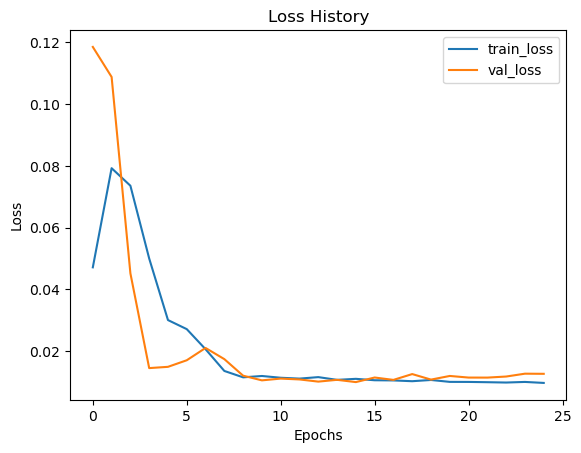

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

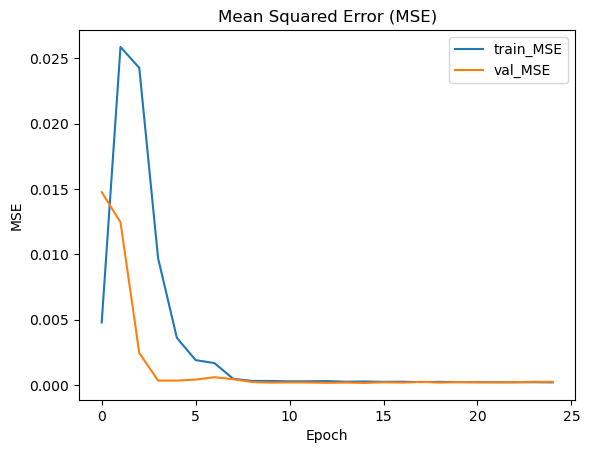

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

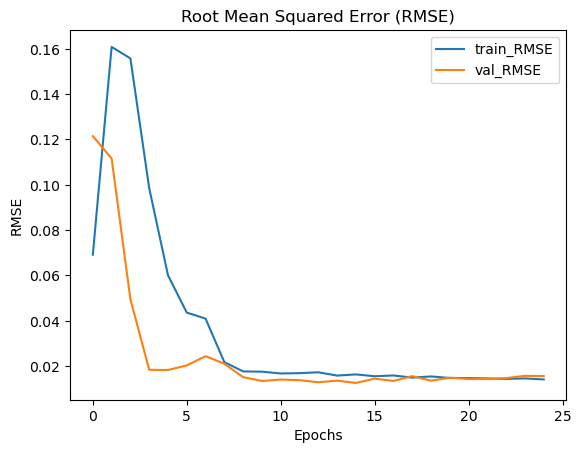

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

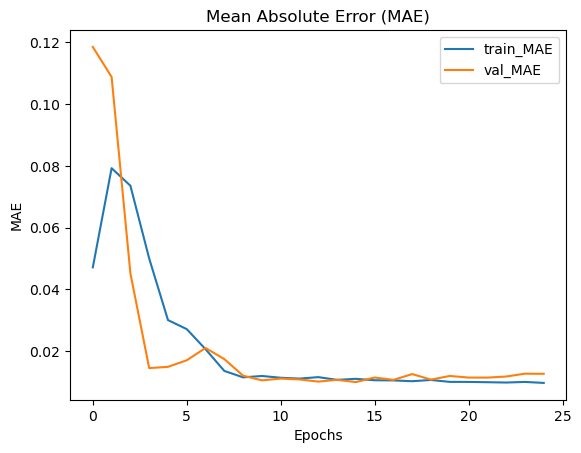

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

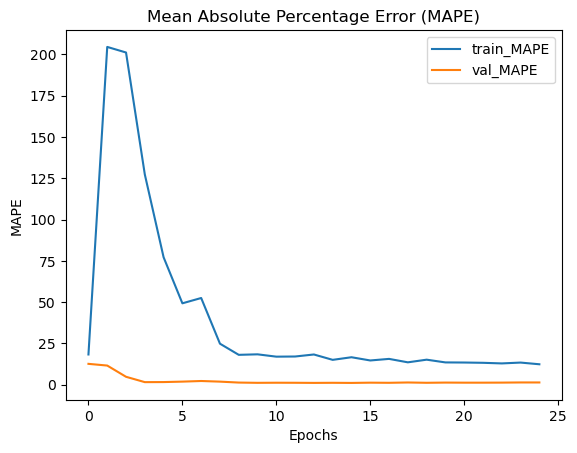

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:23:12.384737: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 5)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


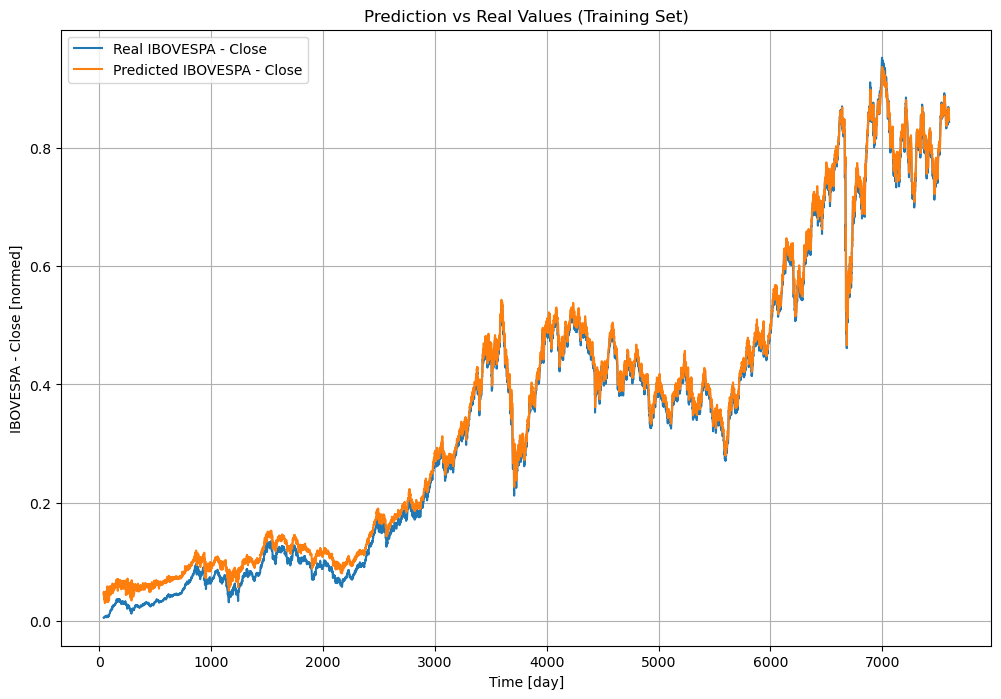

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 5)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


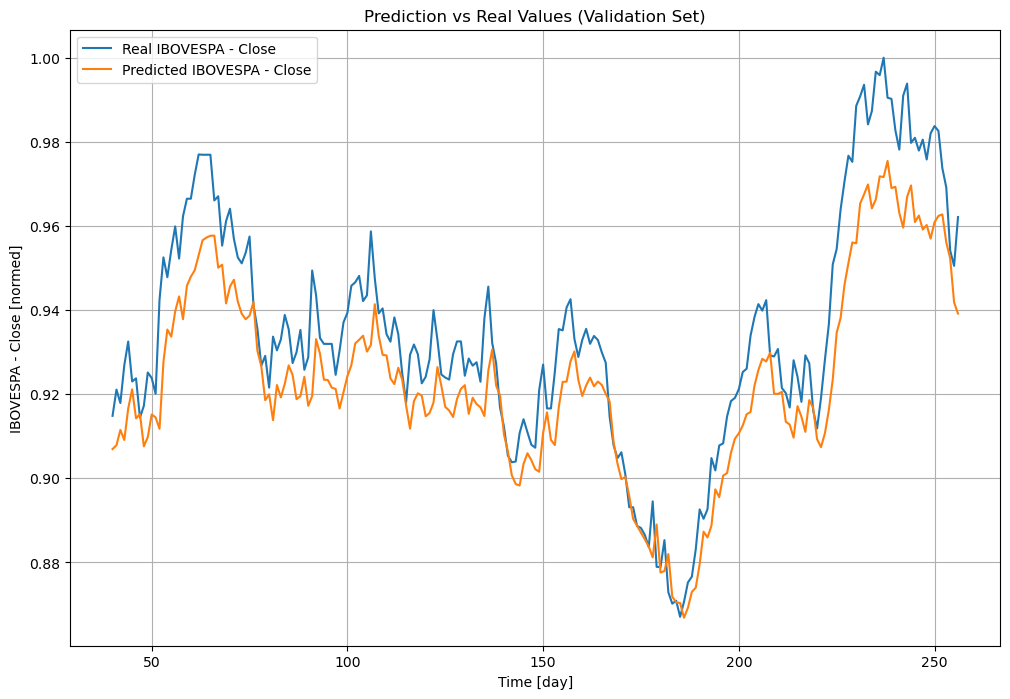

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 5)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


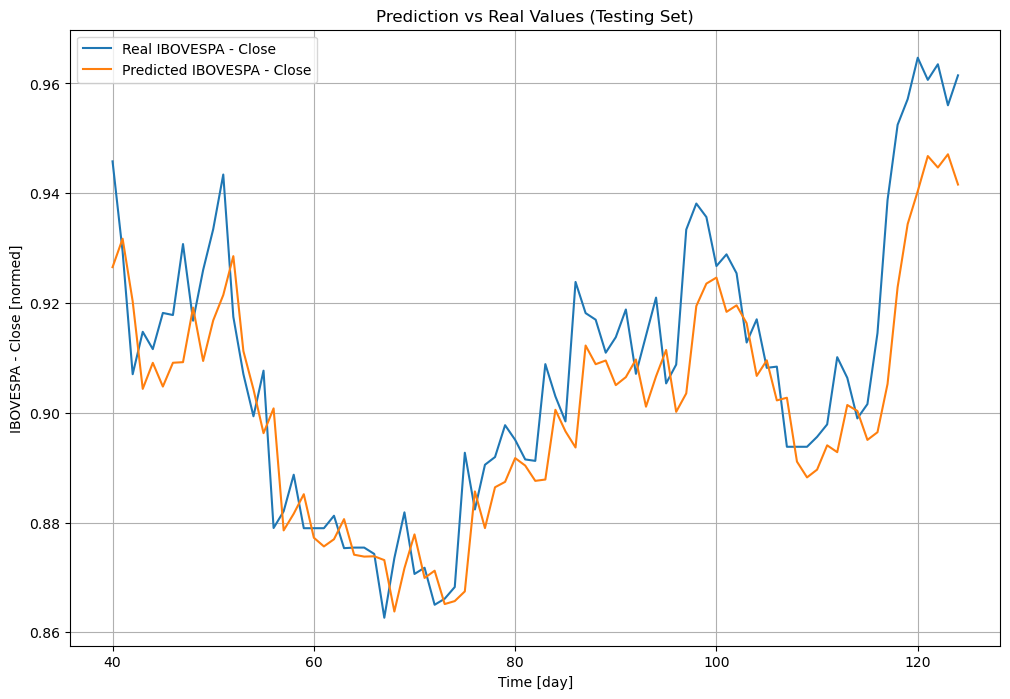

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

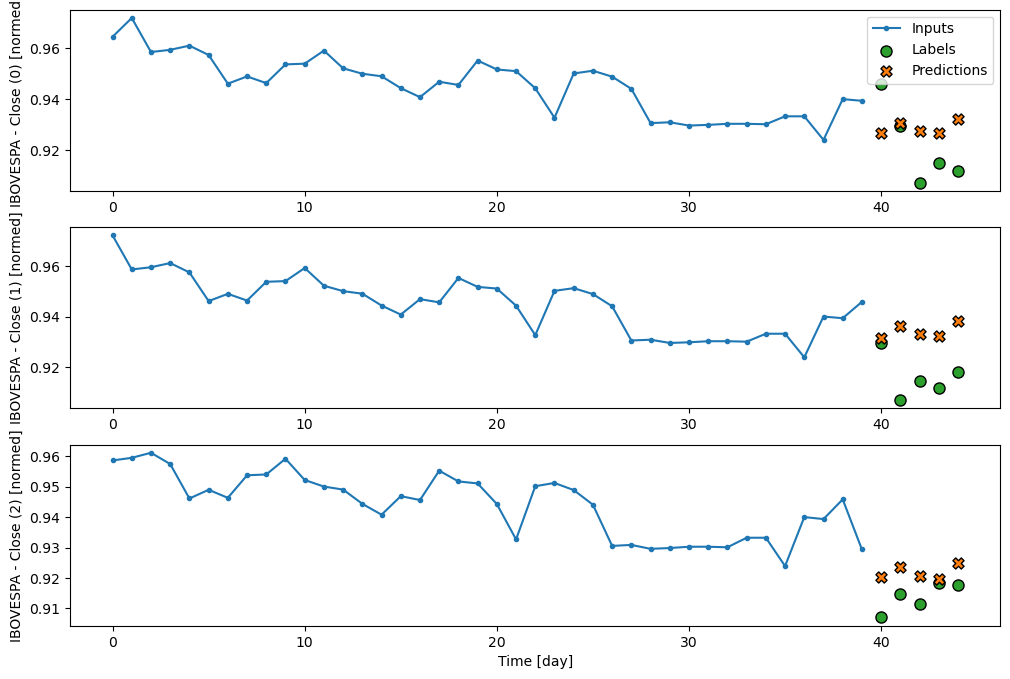

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:8s:253ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


array([[[0.9265307 , 0.9265307 , 0.9265307 , ..., 0.9265307 ,
         0.9265307 , 0.9265307 ],
        [0.9304943 , 0.9304943 , 0.9304943 , ..., 0.9304943 ,
         0.9304943 , 0.9304943 ],
        [0.92751616, 0.92751616, 0.92751616, ..., 0.92751616,
         0.92751616, 0.92751616],
        [0.9266144 , 0.9266144 , 0.9266144 , ..., 0.9266144 ,
         0.9266144 , 0.9266144 ],
        [0.93208826, 0.93208826, 0.93208826, ..., 0.93208826,
         0.9320884 , 0.9320884 ]],

       [[0.9317144 , 0.9317144 , 0.9317144 , ..., 0.9317144 ,
         0.9317144 , 0.9317144 ],
        [0.93619   , 0.93619   , 0.93619   , ..., 0.93619   ,
         0.93619   , 0.93619   ],
        [0.93323576, 0.93323576, 0.93323576, ..., 0.93323576,
         0.93323576, 0.93323576],
        [0.9323678 , 0.9323678 , 0.9323678 , ..., 0.9323678 ,
         0.9323678 , 0.9323678 ],
        [0.9380703 , 0.9380703 , 0.9380703 , ..., 0.9380703 ,
         0.9380704 , 0.9380704 ]],

       [[0.9203037 , 0.9203037 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')